In [1]:
from IPython.display import HTML
def display_alert_1(message, alert_type = "warning"):
    display(HTML(f"<div class= 'alert alert-block alert-{alert_type}'> <H1> {message} </H1></div>"))
def display_alert_2(message, alert_type = "warning"):
    display(HTML(f"<div class= 'alert alert-block alert-{alert_type}'> <H2> {message} </H2></div>"))
def display_alert_color_2(message, color ,alert_type = "info"):
    display(HTML(f"<div class= 'alert alert-block alert-{alert_type}'> <H2> <span style='color:{color}'> {message} </span> </H2></div>"))
def display_alert_color_3(message, color ,alert_type = "success"):
    display(HTML(f"<div class= 'alert alert-block alert-{alert_type}'> <H3> <span style='color:{color}'> {message} </span> </H3></div>"))
def display_alert_color_4(message, color ,alert_type = "warning"):
    display(HTML(f"<div class= 'alert alert-block alert-{alert_type}'> <H4> <span style='color:{color}'> {message} </span> </H4></div>"))
def display_alert_color_5(message, color ,alert_type = "danger"):
    display(HTML(f"<div class= 'alert alert-block alert-{alert_type}'> <H5> <span style='color:{color}'> {message} </span> </H5></div>"))
def display_alert_color_6(message, color ,alert_type = "light"):
    display(HTML(f"<div class= 'alert alert-block alert-{alert_type}'> <H6> <span style='color:{color}'> {message} </span> </H6></div>"))
from datetime import datetime
from termcolor import colored     # To Display Colored Terminal Output
script_start_time = datetime.now()
import time
# get the start time
st = time.time() # To get time in  minutes at the end of Script
display_alert_color_3("Get Script Start Time", "darkblue","info")
print(colored("Script Start Time: ", 'blue', attrs=['bold']) + colored(script_start_time, 'magenta', attrs=['bold']))

Script Start Time: 2023-01-12 15:09:53.841558


In [2]:
input_file_path = "C:/Users/fatima.s/Documents/PythonScripts/DATA SCIENCE/IBM Machine Learning Intermediate/MODULE 5 DEEP LEARNING & REINFORCEMENT LEARNING/DATA/diabetes.csv"
output_file_path = "C:/Users/fatima.s/Downloads/DIABETES Prediction.xlsx"
save_plot = "Features.png" # "C:/Users/fatima.s/Downloads/Features.png"
target = "has_diabetes"
column = 'Corr_'+target # For Statistics
delete_features = ['CustomerID'] # List Specific Features you want to Drop

In [70]:
display_alert_1("IBM Machine Learning <br>", "danger")
display_alert_color_2("Deep Learning and Reinforcement Learning", "darkgreen","success")
display_alert_color_6("In this exercise we will use a neural network to predict diabetes using the Pima Diabetes Dataset. \
We will start by training a Random Forest to get a performance baseline. Then we will use the Keras package to quickly build and train a neural network and compare the performance.\
We will see how different network structures affect the performance, training time, and level of overfitting (or underfitting).", "darkblue" ,"warning")


In [4]:
display_alert_color_4("Import Libraries", "purple","warning")

In [5]:
#Setup
import warnings
warnings.filterwarnings("ignore")
from termcolor import colored     # To Display Colored Terminal Output
from IPython.display import HTML  # To apply markdown colors via function

import numpy as np
import pandas as pd
import pandas
import sweetviz as sv # For Automated Exploratory Data Analysis
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

## Import Keras objects for Deep Learning
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from scikeras.wrappers import KerasClassifier

# Import Keras Reporting Libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import auc, classification_report, accuracy_score, precision_recall_fscore_support, precision_recall_curve, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve

# Import Hyperparameter tuning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

#import talos
import shap # To get feature importance
import re

In [6]:
rs = 123

In [7]:
display_alert_color_4("Read Dataset", "purple","warning")

In [8]:
## Load in the data set 
columns = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
features = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age"]

diabetes_df = pd.read_csv(input_file_path, names=columns, header=0)

In [9]:
display_alert_2("1) Project Overview and Data Description", "danger")
display_alert_color_3("1a) Problem Overview", "darkblue","info")
display_alert_color_4("The drastic and often fatal impacts of diabetes not only are not only worrying but its steady incline expected to reach at 629 million by 2045 has also turned it into global threat (Naz and Ahuja, 2020).\
Despite its alarming increase, diabetes is principally a preventable disease which can be prevented by adopting healthier lifestyle changes which may also decrease probability of developing other diseases like cancer or heart problems.\
Hence, early detection of diabetes through a reliable prognosis tool is crucial to either prevent disease onset or stop its further progression.", "darkblue","warning")
print(colored("", 'green', attrs=['bold'])+colored("\nData Rows & Columns: ", 'blue', attrs=['bold']) + colored(diabetes_df.shape, 'magenta', attrs=['bold']))

display_alert_color_3("1b) About the Dataset Set", "darkblue","info")
display_alert_color_4("1b-i) Brief Description of Chosen Data Set: <br>\
This project uses a hypothetical dataset ‘UCI Pima Diabetes Dataset’ which has\
been acquired for identifying risk of diabetes and was downloaded from the following link:", "darkblue","warning")
display_alert_color_5("&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp&nbsp https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database", "green","warning")

display_alert_color_4("1b-ii) Summary of Data Attributes<br>\
The PIMA dataset exhibits 768 data points (rows) and 9 features (columns) reflecting on patients’ characteristics<br>\
where, based on various factors, each patient has been assigned a Diabetes Score. <br><br>\
Of these, the main features are:<br> &nbsp&nbsp * times_pregnant,<br> &nbsp&nbsp * glucose_tolerance_test,<br> &nbsp&nbsp * blood_pressure,<br>\
&nbsp&nbsp * skin_thickness,<br> &nbsp&nbsp * insulin,<br> &nbsp&nbsp * bmi,<br> &nbsp&nbsp * pedigree_function<br> &nbsp&nbsp * age", "darkmagenta","warning")
#The UCI Pima Diabetes Dataset which has 8 numerical predictors and a binary outcome.
display_alert_color_3("1c) Data Exploration, Data Cleansing and Features Engineering ", "darkblue","info")
display_alert_color_4("1c-i) Data Exploration", "green","warning")

#display_alert_color_4("Display Data Info","darkbrown" ,"warning")
print(colored("Lets take a peek at the data -- {if there are lots of 'NaN' you may have internet connectivity issues.}", 'green', attrs=['bold'])+colored("\nData Rows & Columns: ", 'blue', attrs=['bold']) + colored(diabetes_df.shape, 'magenta', attrs=['bold']))

diabetes_df.sample(3)


Data Rows & Columns: (768, 9)


Lets take a peek at the data -- {if there are lots of 'NaN' you may have internet connectivity issues.}
Data Rows & Columns: (768, 9)


times_pregnant  glucose_tolerance_test  blood_pressure  skin_thickness  \
155               7                     152              88              44   
719               5                      97              76              27   
550               1                     116              70              28   

     insulin   bmi  pedigree_function  age  has_diabetes  
155        0  50.0              0.337   36             1  
719        0  35.6              0.378   52             1  
550        0  27.4              0.204   21             0

In [10]:
df_types = pd.DataFrame(diabetes_df.dtypes)
df_types = df_types.rename(columns={0:'Type'})
#info = pd.concat([df_types, df_nulls], axis=1).reset_index()

display_alert_color_4("Display Data Info","darkbrown" ,"warning")
print(colored("\n\nData Rows & Columns: ", 'blue', attrs=['bold']) + colored(diabetes_df.shape, 'magenta', attrs=['bold']) 
      +colored(("\n\nData Types:\n"), 'red', attrs=['bold'])+colored(df_types, 'red', attrs=['bold'])
      +colored(("\n\n"+ 5*' '+"Data Display:"), 'green', attrs=['bold'])
     )
diabetes_df.sample(3)



Data Rows & Columns: (768, 9)

Data Types:
                           Type
times_pregnant            int64
glucose_tolerance_test    int64
blood_pressure            int64
skin_thickness            int64
insulin                   int64
bmi                     float64
pedigree_function       float64
age                       int64
has_diabetes              int64

     Data Display:


times_pregnant  glucose_tolerance_test  blood_pressure  skin_thickness  \
220               0                     177              60              29   
567               6                      92              62              32   
587               6                     103              66               0   

     insulin   bmi  pedigree_function  age  has_diabetes  
220      478  34.6              1.072   21             1  
567      126  32.0              0.085   46             0  
587        0  24.3              0.249   29             0

In [11]:
display_alert_color_3("Initial Exploratory Data Analysis", "green", "success")
display_alert_color_4("Perform Quick EDA: To see dataset’s distribution and its dispersion. ","teal", "warning")

In [12]:
df_eda = sv.analyze(diabetes_df) # Use Sweetviz for Automated EDA
df_eda.show_html() # Uncomment this line to load Sweetviz Visualization


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
display_alert_color_4("Method to Generate Preliminary Exploratory Data Analysis ","teal","warning")

In [14]:
def analysis(*name): # This Method will extract dataframe by name 
    n = name # Extract Dataframe by Name...this will create a 3d tuple
    n = (n[0]) # Convert Tuple to To Dataframe
    df_name = [x for x in globals() if globals()[x] is n][0] # Extract Name of Imported Dataframe to print later
   
    # Perform Statistics
    stats = n.describe(include = 'all').transpose()
    stats = stats.fillna(0) # Replace all Nan Values with Zero
    
    # Data Analysis
    obs = n.shape[0]
    types = n.dtypes
    counts = n.apply(lambda x: x.count())   
    distincts = n.apply(lambda x: x.unique().shape[0])
    nulls = n.apply(lambda x: x.isnull().sum())
    uniques = n.apply(lambda x: [x.unique()])
    per_nulls = (n.isnull().sum()/ obs) * 100
    skewness = n.skew()
    kurtosis = n.kurt() 
    corr = n.corrwith(n[target])# "SalePrice"
    #corr = corr.to_string()
    
    # Transform Data Analysis to Dataframe
    analyze = pd.DataFrame(columns=['Columns','types', 'counts', 'distincts', 'nulls', '% nulls', 'uniques', 'skewness', 'kurtosis', column])
    analyze['types'] = types
    analyze['counts'] = counts
    analyze['distincts'] = distincts
    analyze['nulls'] = nulls
    analyze['% nulls'] = per_nulls
    analyze['uniques'] = uniques
    analyze['skewness'] = skewness
    analyze['kurtosis'] = kurtosis
    analyze[column] = corr
    analyze['Columns'] = analyze.index
    analyze = analyze.fillna(0).sort_values(by=[column,'skewness'], ascending=False) #Fill Remaining Missing Values with Zero
    analyze = analyze.replace(["NaN"], 0).sort_values(by=column, ascending=False)
    analyze = analyze.reset_index(drop=True)    
        
    print(colored("\nData Analysis for: ", 'blue', attrs=['bold'])
          +colored((df_name), 'red', attrs=['bold'])
          + colored("\nData Shape:", 'green', attrs=['bold'])
          +colored(obs, 'magenta', attrs=['bold'])
         )

    return analyze, stats

In [15]:
analyze, stats = analysis(diabetes_df)
print(colored("\nSummary Statistics\n", 'cyan', attrs=['bold']))
stats


Data Analysis for: diabetes_df
Data Shape:768

Summary Statistics



count        mean         std     min       25%  \
times_pregnant          768.0    3.845052    3.369578   0.000   1.00000   
glucose_tolerance_test  768.0  120.894531   31.972618   0.000  99.00000   
blood_pressure          768.0   69.105469   19.355807   0.000  62.00000   
skin_thickness          768.0   20.536458   15.952218   0.000   0.00000   
insulin                 768.0   79.799479  115.244002   0.000   0.00000   
bmi                     768.0   31.992578    7.884160   0.000  27.30000   
pedigree_function       768.0    0.471876    0.331329   0.078   0.24375   
age                     768.0   33.240885   11.760232  21.000  24.00000   
has_diabetes            768.0    0.348958    0.476951   0.000   0.00000   

                             50%        75%     max  
times_pregnant            3.0000    6.00000   17.00  
glucose_tolerance_test  117.0000  140.25000  199.00  
blood_pressure           72.0000   80.00000  122.00  
skin_thickness           23.0000   32.00000   99.00  
insulin                  30.5000  127.25000  846.00  
bmi                      32.0000   36.60000   67.10  
pedigree_function         0.3725    0.62625    2.42  
age                      29.0000   41.00000   81.00  
has_diabetes              0.0000    1.00000    1.00

In [16]:
display_alert_color_4("1c-ii) Data Cleansing Actions & Features Engineering", "green","warning")
display_alert_color_4("Method to Encode Object Type Columns:","teal","success")
display_alert_color_5("1) List Object Type Columns & Encode Data <br>2) Make Decoder to Decode Encoded Data  ","teal","warning")
display_alert_color_4("Method to Drop Columns","green","success")
display_alert_color_5(" 1) With Distinct < 2 <br>2) With High Skewness and Low Correlation to Target <br>3) Drop Columns With High Nan Values","teal","warning")

In [17]:
def drop_cols(*name):
    n = name # Extract Dataframe by Name...this will create a 3d tuple
    n = (n[0]) # Convert Tuple to To Dataframe
    df_name = [x for x in globals() if globals()[x] is n][0] # Extract Name of Imported Dataframe 
      
    n = n.fillna(0) #Fill Remaining Missing Values with Zero
    # Find Mean of Null, Nan and Zero Values Before Any Drops
    m0 = n.isin([' ','NULL','NaN', 0]).mean().sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
    
    #  1) Drop Columns with Unique Values Less than threshold   
    unique_counts = pd.DataFrame.from_records([(col, n[col].nunique()) for col in n.columns], # get unique counts
                          columns=['Column_Name', 'Unique']).sort_values(by=['Unique'])
    unique = unique_counts[(unique_counts['Unique'] < 2)] #If threshold is lesss than 2 then 
    drop1 = (unique['Column_Name'].tolist()) # First List of columns to drop
    
    print(colored("\nDrop 1: ", 'blue', attrs=['bold'])
          +colored(drop1, 'magenta', attrs=['bold']))
  
    # 2) Drop Highly Skewed & Low Correlation Columns with target
    drop2 = analyze[(analyze[column] != 1.000000) & ((analyze['skewness'] > 1) & (analyze[column] < 0))]
    print(colored("\nDrop 2: \n ", 'blue', attrs=['bold'])
          +colored(drop2, 'magenta', attrs=['bold']))
    
    drop2 = drop2.sort_values(by='Columns', ascending=True)
    drop2 = drop2['Columns'].tolist() # Second List of columns to drop
    
    drop = drop1 + drop2 + delete_features # Final List of columns to drop
    print(colored("\nFinal Column Drop List: ", 'blue', attrs=['bold'])
          +colored(drop, 'magenta', attrs=['bold']))
    
    if target in drop: # Remove Target from List
        drop = drop.remove(target)
    else:
        print(target, " Not Found.")

    n = n.drop(columns=[col for col in n if col in drop]) # Drop Dataframe Columns if in List
    
    # Find Mean of Null, Nan and Zero Values Before Dropping
    m1 = n.isin([' ','NULL','NaN', 0]).mean().sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
    
    # 3) Drop Columns With High Nan Values
    #drop_thresh = .90 # Identify Drop Threshold
    #n = n.loc[:, df.isin([' ','NULL', 'NaN',0]).mean() > drop_thresh] # drop columns if Mean is > 0.90
    
    n = n.fillna(0) #Fill Remaining Missing Values with Zero
    #n = n.replace(["NaN"], 0).sort_values(by=target, ascending=False) # Replace all Nan Values with Zero
    
    # Find Mean of Null, Nan and Zero Values After Dropping 
    m2 = n.isin([' ','NULL','NaN']).mean().sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
        
    #Print Results
    print(colored("\nDataframe Average Null Values Before Any Drops\n ", 'blue', attrs=['bold'])
          +colored(m0, 'magenta', attrs=['bold'])
          +colored("\n\n Low Distict Columns to Drop: ", 'green', attrs=['bold'])
          + colored(drop1, 'red', attrs=['bold'])
          +colored("\n\nDataframe Average Null Values After Dropping Highly Skewed Columns\n ", 'green', attrs=['bold'])
          +colored(m1, 'red', attrs=['bold'])
          +colored("\n\n Drop Columns if Mean is > 0.90 \n", 'green', attrs=['bold']) 
          + colored("\nDataframe Average Null Values After Drop and 'Nan' Replacement\n", 'blue', attrs=['bold'])
          +colored(m2, 'magenta', attrs=['bold']) 
          +colored(type(m2), 'magenta', attrs=['bold']) 
         )
    return n

# Return Function
n = drop_cols(diabetes_df)
diabetes_df = n.copy()
#df.info()


Drop 1: []

Drop 2: 
 Empty DataFrame
Columns: [Columns, types, counts, distincts, nulls, % nulls, uniques, skewness, kurtosis, Corr_has_diabetes]
Index: []

Final Column Drop List: ['CustomerID']
has_diabetes  Not Found.

Dataframe Average Null Values Before Any Drops
 has_diabetes              0.651042
insulin                   0.486979
skin_thickness            0.295573
times_pregnant            0.144531
blood_pressure            0.045573
bmi                       0.014323
glucose_tolerance_test    0.006510
age                       0.000000
pedigree_function         0.000000
dtype: float64

 Low Distict Columns to Drop: []

Dataframe Average Null Values After Dropping Highly Skewed Columns
 has_diabetes              0.651042
insulin                   0.486979
skin_thickness            0.295573
times_pregnant            0.144531
blood_pressure            0.045573
bmi                       0.014323
glucose_tolerance_test    0.006510
age                       0.000000
pedigree_functi

In [18]:
display_alert_color_4("Analyze Data:\n ","green" ,"warning")

In [19]:
analyze, stats = analysis(diabetes_df) 
analyze


Data Analysis for: diabetes_df
Data Shape:768


Columns    types  counts  distincts  nulls  % nulls  \
0            has_diabetes    int64     768          2      0      0.0   
1  glucose_tolerance_test    int64     768        136      0      0.0   
2                     bmi  float64     768        248      0      0.0   
3                     age    int64     768         52      0      0.0   
4          times_pregnant    int64     768         17      0      0.0   
5       pedigree_function  float64     768        517      0      0.0   
6                 insulin    int64     768        186      0      0.0   
7          skin_thickness    int64     768         51      0      0.0   
8          blood_pressure    int64     768         47      0      0.0   

   uniques  skewness  kurtosis  Corr_has_diabetes  
0        0  0.635017 -1.600930           1.000000  
1        0  0.173754  0.640780           0.466581  
2        0 -0.428982  3.290443           0.292695  
3        0  1.129597  0.643159           0.238356  
4        0  0.901674  0.159220           0.221898  
5        0  1.919911  5.594954           0.173844  
6        0  2.272251  7.214260           0.130548  
7        0  0.109372 -0.520072           0.074752  
8        0 -1.843608  5.180157           0.065068

In [20]:
display_alert_color_3("Method to Explore and Adjust Outliers:", "darkgreen","success")
display_alert_color_4("Replace Outlier Values with Mode (Most Frequent Value)", "darkblue","warning")

In [21]:
def outliers(*name):
    n = name # Extract Dataframe by Name...this will create a 3d tuple
    n = (n[0]) # Convert Tuple to To Dataframe
    df_name = [x for x in globals() if globals()[x] is n][0] # Extract Name of Imported Dataframe 
    
    cols = n.columns # All Columns
    
    # Numeric Columns
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric_cols = n.select_dtypes(include=numerics) 
    numeric_cols = numeric_cols.columns.tolist()
    
    # Object Columns
    categorical_cols = list(set(cols) - set(numeric_cols))

    # Skewed Columns
    skewed_cols = analyze[(analyze['skewness'] > 0) | (analyze['skewness'] < 0)] 
    skewed_cols = skewed_cols['Columns'].tolist()
    skewed_cols.remove(target) # Remove target column

    # Replace Outliers
    for col in n.columns:
        if col in skewed_cols:
            print(colored(col, 'magenta', attrs=['bold'])
                      + colored(" is Skewed... ", 'blue', attrs=['bold'])
                     )
            
            mode = n[col].mode()
            mode = mode[0]

            if col in numeric_cols:
                print(colored(col, 'magenta', attrs=['bold'])
                      + colored(" Column Type is: ", 'blue', attrs=['bold'])
                      + colored(n[col].dtypes, 'red', attrs=['bold'])
                     )
                #Calculate quantiles and IQR
                Q1 = n[col].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
                Q3 = n[col].quantile(0.75)
                IQR = Q3 - Q1
                # Replace with Mode
                n[col] = np.where((n[col] < (Q1 - 1.5 * IQR)) | (n[col] > (Q3 + 1.5 * IQR)), mode, n[col])

                print(colored("\nReplaced ", 'blue', attrs=['bold'])
                      +colored(col, 'magenta', attrs=['bold'])
                      + colored(" Skewed Values by Mode: ", 'blue', attrs=['bold'])
                      + colored(mode, 'red', attrs=['bold'])
                      + colored('\n', 'magenta', attrs=['bold'])
                      + colored((n[col]), 'green', attrs=['bold'])
                     )
                
            else:
                print("")
    df_transformed = n.copy()
    return df_transformed

In [22]:
display_alert_color_4("Apply 'outliers' Method to New Dataframe", "indigo","warning")
df_transformed = diabetes_df.copy() # First Copy Dataframe to a New Dataframe
df_transformed = outliers(df_transformed) # Apply 'outliers' Function to the New Dataframe
#df_transformed

times_pregnant is Skewed... 
times_pregnant Column Type is: int64

Replaced times_pregnant Skewed Values by Mode: 1
0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: times_pregnant, Length: 768, dtype: int64
glucose_tolerance_test is Skewed... 
glucose_tolerance_test Column Type is: int64

Replaced glucose_tolerance_test Skewed Values by Mode: 99
0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: glucose_tolerance_test, Length: 768, dtype: int64
blood_pressure is Skewed... 
blood_pressure Column Type is: int64

Replaced blood_pressure Skewed Values by Mode: 70
0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: blood_pressure, Length: 768, dtype: int64
skin_thickness is Skewed... 
skin_thickness Column Type is: int64

Replaced skin_thickness Skewed Values by Mode: 0
0      35
1      

In [23]:
display_alert_color_4("Apply 'Analysis' Method to both Original and New Dataframe\n ","green" ,"warning")

In [24]:
analyze, stats = analysis(diabetes_df) # Re-Call 'analysis' Function and return analysis
analyze_df = analyze
analyze_df


Data Analysis for: diabetes_df
Data Shape:768


Columns    types  counts  distincts  nulls  % nulls  \
0            has_diabetes    int64     768          2      0      0.0   
1  glucose_tolerance_test    int64     768        136      0      0.0   
2                     bmi  float64     768        248      0      0.0   
3                     age    int64     768         52      0      0.0   
4          times_pregnant    int64     768         17      0      0.0   
5       pedigree_function  float64     768        517      0      0.0   
6                 insulin    int64     768        186      0      0.0   
7          skin_thickness    int64     768         51      0      0.0   
8          blood_pressure    int64     768         47      0      0.0   

   uniques  skewness  kurtosis  Corr_has_diabetes  
0        0  0.635017 -1.600930           1.000000  
1        0  0.173754  0.640780           0.466581  
2        0 -0.428982  3.290443           0.292695  
3        0  1.129597  0.643159           0.238356  
4        0  0.901674  0.159220           0.221898  
5        0  1.919911  5.594954           0.173844  
6        0  2.272251  7.214260           0.130548  
7        0  0.109372 -0.520072           0.074752  
8        0 -1.843608  5.180157           0.065068

In [25]:
analyze, stats = analysis(df_transformed) # Re-Call 'analysis' Function and return analysis
analyze_df_transformed = analyze
analyze_df_transformed


Data Analysis for: df_transformed
Data Shape:768


Columns    types  counts  distincts  nulls  % nulls  \
0            has_diabetes    int64     768          2      0      0.0   
1  glucose_tolerance_test    int64     768        135      0      0.0   
2                     bmi  float64     768        240      0      0.0   
3                     age    int64     768         46      0      0.0   
4          times_pregnant    int64     768         14      0      0.0   
5          blood_pressure    int64     768         40      0      0.0   
6       pedigree_function  float64     768        489      0      0.0   
7                 insulin    int64     768        156      0      0.0   
8          skin_thickness    int64     768         50      0      0.0   

   uniques  skewness  kurtosis  Corr_has_diabetes  
0        0  0.635017 -1.600930           1.000000  
1        0  0.541734 -0.266439           0.491524  
2        0  0.258876 -0.327769           0.300615  
3        0  1.036358  0.241146           0.266542  
4        0  0.830367 -0.150326           0.197796  
5        0  0.095037  0.109450           0.162102  
6        0  0.974418  0.263198           0.141723  
7        0  1.157309  0.376605           0.069703  
8        0 -0.026543 -1.180519           0.064667

In [26]:
display_alert_color_3("Visualize Data Distribution of both Original and New Dataframe:", "darkblue","warning")
display_alert_color_4("Change the cell below to 'Code' to run visualizations.", "red","warning")

In [27]:
display_alert_2("2) Main Objectives of Analysis", "danger")
display_alert_color_3("Even though healthcare organizations normally collect big data including electronic health records and images, nevertheless, its robust analysis to acquire meaningful and reliable insights remains a key challenge.<br>\n\
Given promising results evidenced by deep and other machine learning methodologies, such medical data can be automatically analysed to discover hidden patterns and factors which may aid in diabetes diagnosis at an early stage.<br><br>\n\
Hence, the main objective of this project is to present an automated methodology for employing different variations of Keras deep learning model for diabetes prediction using the PIMA dataset.<br><br>\n\
Secondary objective are as follows:<br>\n\
1. Build a baseline Random Forest Model (RFM) for comparison<br>\n\
2. Develop automated grid search method for selecting best hyperparameters for Keras model development<br>\n\
3. Evaluate Keras results and compare with those of RFM to validate model robustness<br>\n\
", "darkgreen","info")

In [28]:
display_alert_color_2("DEEP LEARNING KERAS MODELS WITH HYPERTUNED PARAMETERS","darkmagenta", "danger")

In [29]:
display_alert_color_4("Split Data for Feature Importance","darkgreen", "warning")

In [30]:
X = df_transformed.loc[ : , df_transformed.columns != target] # X = diabetes_df.iloc[:, :-1].values
y = df_transformed[target].astype('int') # y = diabetes_df["has_diabetes"].values
c = int(len(X.columns)) # Get number of Features

display_alert_color_3("Provide Method to Split Training and Testing Dataset","darkgreen", "success")

In [31]:
def split_data(*name):
    n = name # Extract Dataframe by Name...this will create a 3d tuple
    n = (n[0]) # Convert Tuple to To Dataframe
    df_name = [x for x in globals() if globals()[x] is n][0] # Extract Name of Imported Dataframe to print later
    X = n.loc[ : , n.columns != target] # Remove Target Column
    y = n[target].astype('int') 
    return train_test_split(X, y, test_size=0.25, stratify=y, random_state = rs)

display_alert_color_4("Split Data into Test & Train Set: ","darkgreen", "warning")

In [32]:
X_train, X_test, y_train, y_test = split_data(df_transformed) # Call the Method to Split Training and Testing Dataset

# Normalize Data
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

display_alert_color_4("Calculate Mean to Check Proportion of Positive Values: ","darkbrown", "warning")

In [33]:
# Take out the mean to show what proportion of dataset will be positive value
#y = df_transformed[target].astype('int')
print(colored("Mean of y {patients with diabetes}: ", 'green', attrs=['bold'])
      +colored('%.2f' %np.mean(y), 'blue', attrs=['bold'])
      +colored("\nMean of 1-y {patients without diabetes}: ", 'green', attrs=['bold'])
      +colored('%.2f' %np.mean(1-y), 'magenta', attrs=['bold'])
      +colored("\n\nThis means we can get an accuracy of ", 'blue', attrs=['bold'])
      +colored(('%.2f' %(np.mean(1-y)*100) + ' %'), 'magenta', attrs=['bold'])
      +colored(" without any model - just declare that no one has diabetes.  ", 'blue', attrs=['bold'])
      +colored("\nWe will calculate the ROC-AUC score to evaluate performance of our model,", 'blue', attrs=['bold'])
      +colored("\nand also look at the accuracy as well to see if we improved upon the ", 'blue', attrs=['bold'])
      +colored(('%.2f' %(np.mean(1-y)*100) + ' %'), 'magenta', attrs=['bold'])
      +colored(" accuracy.", 'blue', attrs=['bold'])
     )

display_alert_color_3("Exercise 1: Build a baseline performance using Random Forest","darkmagenta", "danger")
print(colored("To begin, and get a baseline for classifier performance:\n", 'green', attrs=['bold'])
      +colored("1. Train a Random Forest model with 200 trees on the training data.\n", 'red', attrs=['bold'])
      +colored("2. Calculate the accuracy and roc_auc_score of the predictions.", 'red', attrs=['bold'])
     )

Mean of y {patients with diabetes}: 0.35
Mean of 1-y {patients without diabetes}: 0.65

This means we can get an accuracy of 65.10 % without any model - just declare that no one has diabetes.  
We will calculate the ROC-AUC score to evaluate performance of our model,
and also look at the accuracy as well to see if we improved upon the 65.10 % accuracy.


To begin, and get a baseline for classifier performance:
1. Train a Random Forest model with 200 trees on the training data.
2. Calculate the accuracy and roc_auc_score of the predictions.


In [34]:
display_alert_color_3("Method to 'Capture Feature Importance' ","darkgreen", "success")

In [35]:
def feature_importance(df_transformed, model):
    fi = pd.DataFrame()
    fi["Factors"] = df_transformed.columns
    fi["Importance"] = model.feature_importances_
    return fi.sort_values(by="Importance", ascending=True)
display_alert_color_3("Method to 'Evaluate Model Results' ","darkgreen", "success")

In [36]:
def evaluate(y_test, preds, eval_type=""):
    results= {}
    results['type'] = eval_type
    # Accuracy
    results['accuracy'] = accuracy_score(y_test, preds)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
    results['recall'] = recall
    # Precision
    results['precision'] = precision
    # Fscore
    results['fscore'] = f_beta
    # AUC
    results['auc'] = roc_auc_score(y_test, preds)
    return results
#################################################################
display_alert_color_3("Method to Plot 'ROC Curve'","darkgreen", "success")

In [37]:
#import matplotlib.pyplot as plt
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
    # Color Curve
    #plt.gca().get_lines()[0].set_color("black")
    ax.patch.set_facecolor('lightyellow')
    for ax in plt.gcf().axes:
        ax.get_lines()[0].set_color("red")

In [38]:
print(colored("We will use grid search to find best parameters for different optimizers.\n", 'green', attrs=['bold'])
      +colored("We will set the input shape to number of final features.\n", 'blue', attrs=['bold'])
     )
display_alert_color_2("3) Summary of Training Different Deep Learning Models ", "darkblue","danger")
display_alert_color_3("Grid Search Method to Find 'Best Parameters'to 'Build Random Forest WITH Optimal Parameters' ","darkgreen", "success")

We will use grid search to find best parameters for different optimizers.
We will set the input shape to number of final features.



In [39]:
# Method for Grid Search Hyperparameters for a Random Forest Model
def grid_search_rf(X_train, y_train):
    # Parameters
    params_grid = {
    'max_depth': [2*n+1 for n in range(10) ], #[5, 10, 15, 20],
    'n_estimators': [2*n+1 for n in range(20)], #[25, 50, 100],
    'min_samples_split': [2, 5]
    }
    # RF Model
    rf_model = RandomForestClassifier(random_state=rs)
    
    # Search Best Parameters
    grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    # Train Model with Best Parameters
    grid_search.fit(X_train, y_train)
    
    # Get Best/optimal parameters
    best_params = grid_search.best_params_
    #Best_Score = grid_search.best_score_
    #accuracy = get_accuracy(X_train, X_test, y_train, y_test, grid_search.best_estimator_)
    return best_params

In [40]:
display_alert_color_4("Get `Optimal Parameters` for RF Model using Grid Search RF Method above","darkbrown", "warning")

In [41]:
#Calculate StartTime to Measure Script Execution Time at the End of Script
start_time = datetime.now()

#Get Optimal Parameters for RF Model using "grid_search_rf" Method to Find 'Best/Optimal Parameters'
best_params = grid_search_rf(X_train, y_train) # From the cell above, Call grid_search_rf(X_train, y_train)

best_params_df = pd.DataFrame([best_params]) # Dictionary To dataframe
print(best_params_df)

# Make Optimal Parameter Variables
#optimal_class_weight = (best_params_df.at[0,'class_weight'])
#print(optimal_class_weight)
optimal_max_depth = (best_params_df.at[0,'max_depth'])
print(optimal_max_depth)
optimal_min_samples_split = (best_params_df.at[0,'min_samples_split'])
print(optimal_min_samples_split)
optimal_n_estimators = (best_params_df.at[0,'n_estimators'])
print(optimal_n_estimators)

# Define Optimal Parameters
optimal_rf_params = {'bootstrap': True,
                         #'class_weight': optimal_class_weight, 
                         'max_depth': optimal_max_depth, 
                         'min_samples_split': optimal_min_samples_split, 
                         'n_estimators': optimal_n_estimators}
print(optimal_rf_params)

#Print Total Execution Time
print('Model Execution Time: ', datetime.now() - start_time)

display_alert_color_3("Method to 'Build Random Forest WITH or WITHOUT Class Weights' ","darkblue", "success")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
   max_depth  min_samples_split  n_estimators
0         13                  2            17
13
2
17
{'bootstrap': True, 'max_depth': 13, 'min_samples_split': 2, 'n_estimators': 17}
Model Execution Time:  0:00:56.536545


In [42]:
def build_op_rf(X_train, y_train, X_test, threshold=0.5, best_params=None):  
    model = RandomForestClassifier(random_state = rs)
    # If best parameters are provided
    if best_params:
        model = RandomForestClassifier(random_state = rs,
                                   # If bootstrap sampling is used
                                   bootstrap = True, # False if Bootstaping is being kept as None
                                   # Max depth of each tree
                                   max_depth = optimal_rf_params['max_depth'],
                                   # Number of trees
                                   n_estimators=optimal_rf_params['n_estimators'],
                                   # Minimal samples to split
                                   min_samples_split=optimal_rf_params['min_samples_split'])
    # Train the model   
    model.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = model.predict_proba(X_test)
    #y_pred_class_rf = rf_model.predict(X_test)
    #y_pred_prob_rf = rf_model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model

display_alert_color_3("RF Model WITH Auto-Hypertuned Parameters","darkblue", "info")

{'type': 'RForest', 'accuracy': 0.7760416666666666, 'recall': 0.6865671641791045, 'precision': 0.6764705882352942, 'fscore': 0.6861732644865174, 'auc': 0.7552835820895524, 'Factors': 'RF1_features_df'} 
RF_acc:  0.7552835820895524


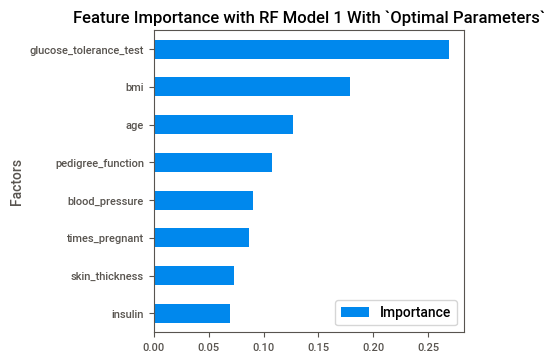

In [43]:
#Running the Model...Call Method to 'Build Simple Random Forest With Class Weights'
op_preds, op_model = build_op_rf(X_train, y_train, X_test, best_params=optimal_rf_params) # Call Method to 'Build Simple Random Forest Without Class Weights' 

#Collect Results
original_results = evaluate(y_test, op_preds, eval_type="RForest")
original_results["Factors"] = 'RF1_features_df'
rf_acc = original_results['auc'] # Extract Roc_acc for comparison with deep learning models
print(original_results, "\nRF_acc: ",rf_acc)

# Get Factors Contributing to Diabetes
RF1_features_df = feature_importance(X, op_model)[:40]
RF1_features_df = RF1_features_df[RF1_features_df['Importance'] > 0] # Filter Features with Negative Correlation
RF1_features_df = RF1_features_df.sort_values(by=['Importance'],ascending=True) # Attach Importance to data before split

# Capture Model Drivers in  Dataframe
RF1_drivers = [['Uses train test set to achieve best hypertuninge to resample data from train set to achieve balanced class.'],
               ['No optimal parameters were used.'], 
               ['Runs random forest model with above drivers to get top contributory features.']] # initialize list of lists
RF1_drivers = pd.DataFrame(RF1_drivers, columns=['Main Drivers behind RF1 model are as follows:']) # Create the pandas DataFrame
RF1_drivers.index = np.arange(1,len(RF1_drivers)+1)

# Plot Features
RF1_features_df.set_index('Factors', inplace=True)
RF1_features_df.plot(kind='barh', figsize=(4, 4))
plt.title('Feature Importance with RF Model 1 With `Optimal Parameters`')

# Merge Description to Encoded Features/Factors
RF1_features_df = RF1_features_df.rename_axis('Factors').reset_index() # Reset index before copying it to column
#RF1_features_df = pd.merge(RF1_features_df,factor_list,on='Factors',how='left',indicator=True).replace(np.nan, "") # Merge Data
#RF1_features_df['Description'] = np.where(RF1_features_df['Description'] == '/', RF1_features_df['Factors'], RF1_features_df['Description'])
#RF1_features_df['Description'] = RF1_features_df['Description'].replace(r'_', ' ', regex=True) # Replace Underscore with single space
final_columns = ['Factors', 'Importance', 'Description'] # List of Columns to keep
RF1_features_df = RF1_features_df.drop(columns=[col for col in RF1_features_df if col not in final_columns]) # Drop Columns if not in list
#print(op_preds)

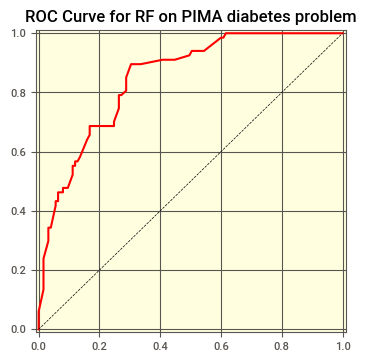

In [44]:
y_pred_prob_rf = op_model.predict_proba(X_test)
#import matplotlib.pyplot as plt
plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')

In [45]:
display_alert_color_3("3a) Keras Hyperparameter Tuning using Grid Search", "darkblue","success")

In [46]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(6, input_shape=(int(len(X.columns)),), activation='relu'))
    model.add(Dense(6, input_shape=(int(len(X.columns)),), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
#seed = 7
#tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40]
epochs = [500, 800, 900]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

# Search Best Parameters
param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Create Model
model = KerasClassifier(model=create_model, verbose=0)

# Fit Model
grid_result = grid.fit(X, y)

# Summarize Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#print(params)

means_df = pd.DataFrame(means, columns = ['mean'])
stds_df = pd.DataFrame(stds, columns = ['stds'])
params_df = pd.DataFrame(params)
result_df = pd.merge(means_df, stds_df, left_index=True, right_index=True).sort_values(by=['mean'], ascending=False)
result_df = pd.merge(result_df, params_df, left_index=True, right_index=True).sort_values(by=['mean'], ascending=False)

m = "%.3f" %result_df['mean'].iloc[0]
b = result_df['batch_size'].iloc[0]  
e = result_df['epochs'].iloc[0] 
o = result_df['optimizer'].iloc[0] 
print(colored(result_df.head(3), 'magenta', attrs=['bold'])
              +colored(("\n\nBest Performing Model is: \n"), 'blue', attrs=['bold'])
              +colored(("\nwith Optimizer: "+ str(0)), 'blue', attrs=['bold'])
              +colored(("\n\nHighest Mean: "+ m), 'blue', attrs=['bold'])
              +colored(("\nBest Batch Size: "+ str(b)), 'green', attrs=['bold'])
              +colored(("\nwith Epoch:"+ str(e)), 'red', attrs=['bold']))
result_df

        mean      stds  batch_size  epochs optimizer
15  0.761719  0.024910          10     900   RMSprop
28  0.752604  0.031948          20     800       SGD
13  0.747396  0.012890          10     800     Nadam

Best Performing Model is: 

with Optimizer: 0

Highest Mean: 0.762
Best Batch Size: 10
with Epoch:900


mean      stds  batch_size  epochs optimizer
15  0.761719  0.024910          10     900   RMSprop
28  0.752604  0.031948          20     800       SGD
13  0.747396  0.012890          10     800     Nadam
19  0.746094  0.028348          10     900    Adamax
31  0.742188  0.014616          20     800  Adadelta
..       ...       ...         ...     ...       ...
0   0.696615  0.009207          10     500       SGD
53  0.695312  0.013902          40     800      Adam
45  0.695312  0.011500          40     500  Adadelta
3   0.692708  0.031948          10     500  Adadelta
43  0.677083  0.012075          40     500   RMSprop

[63 rows x 5 columns]

In [47]:
display_alert_color_4("Create Empty Dataframe to Capture Result","darkmagenta", "warning")

In [48]:
# initialize data of lists.
data = {'Optimizer': ['0'],
        'Input Val Loss': [0],
        'Output Val Loss': [0],
        'Input Val Accuracy': [0],
        'Output Val Accuracy': [0]}
# Create DataFrame
res = pd.DataFrame(data)
res

Optimizer  Input Val Loss  Output Val Loss  Input Val Accuracy  \
0         0               0                0                   0   

   Output Val Accuracy  
0                    0

In [49]:
display_alert_color_4("Create Empty Dataframe to Capture Feature Importance","darkmagenta", "warning")

In [50]:
# initialize data of lists.
data = {'Model': ['X'],
        'Features': ['X'],
        'Importance': [0.0]}
# Create DataFrame
model_features = pd.DataFrame(data)
model_features

Model Features  Importance
0     X        X         0.0

In [51]:
display_alert_color_3("Constructing KERAS Multi Layered Models with Hyperparameter Tuned Parameters","darkmagenta", "info")
display_alert_color_4("3b) Automated Model Building and", "darkblue","warning")

[' Building Keras for Optimizers: RMSprop'
 ' Building Keras for Optimizers: SGD'
 ' Building Keras for Optimizers: Nadam'
 ' Building Keras for Optimizers: Adamax'
 ' Building Keras for Optimizers: Adadelta'
 ' Building Keras for Optimizers: Adam'
 ' Building Keras for Optimizers: Adagrad']

RMSprop Model with Batch Size: 10 and Epochs: 900
Creating Model
Fitting Model


Using 576 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Making Model Predictions
Calculating AUC Score
RMSprop Model auc_score :0.8108656716417909
RMSprop: Computing Model validation loss performance
         loss  accuracy  val_loss  val_accuracy
264  0.403722  0.814236  0.519842      0.744792
  Optimizer  Input Val Loss  Output Val Loss  Input Val Accuracy  \
0         0        0.000000         0.000000            0.000000   
1   RMSprop        0.664082         0.519842            0.697917   

   Output Val Accuracy  AUC Score  Epochs  Actual Epochs  
0             0.000000        NaN     NaN            NaN  
1             0.744792   0.810866   900.0          265.0  



RMSprop: List Feature Importance
                 Features  Importance    Model
1  glucose_tolerance_test    0.168594  RMSprop
5                     bmi    0.098901  RMSprop
7                     age    0.075343  RMSprop
4                 insulin    0.035594  RMSprop
6       pedigree_function    0.024697  RMSprop
3          skin_thickness    0.022470  RMSprop
0          times_pregnant    0.021662  RMSprop
2          blood_pressure    0.017175  RMSprop

RMSprop: ROC Curve:


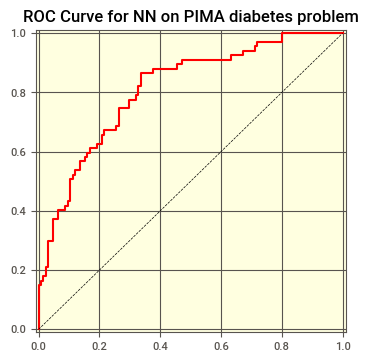

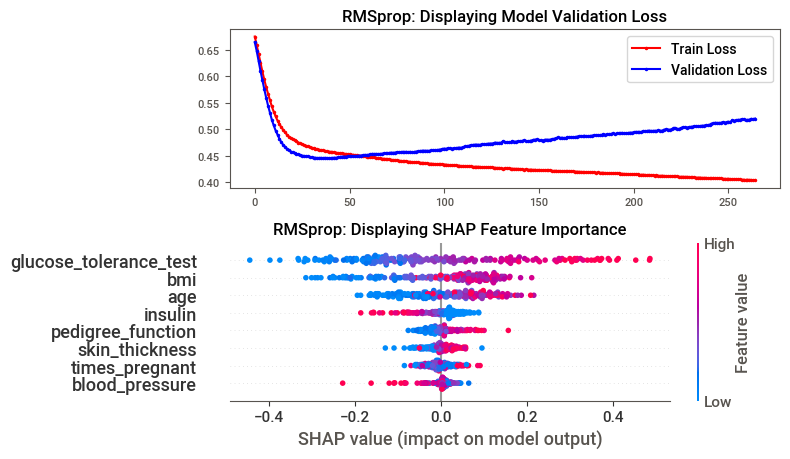

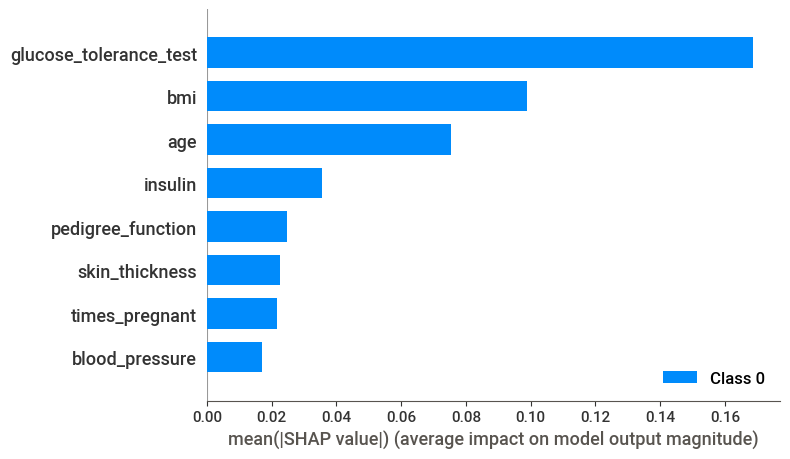

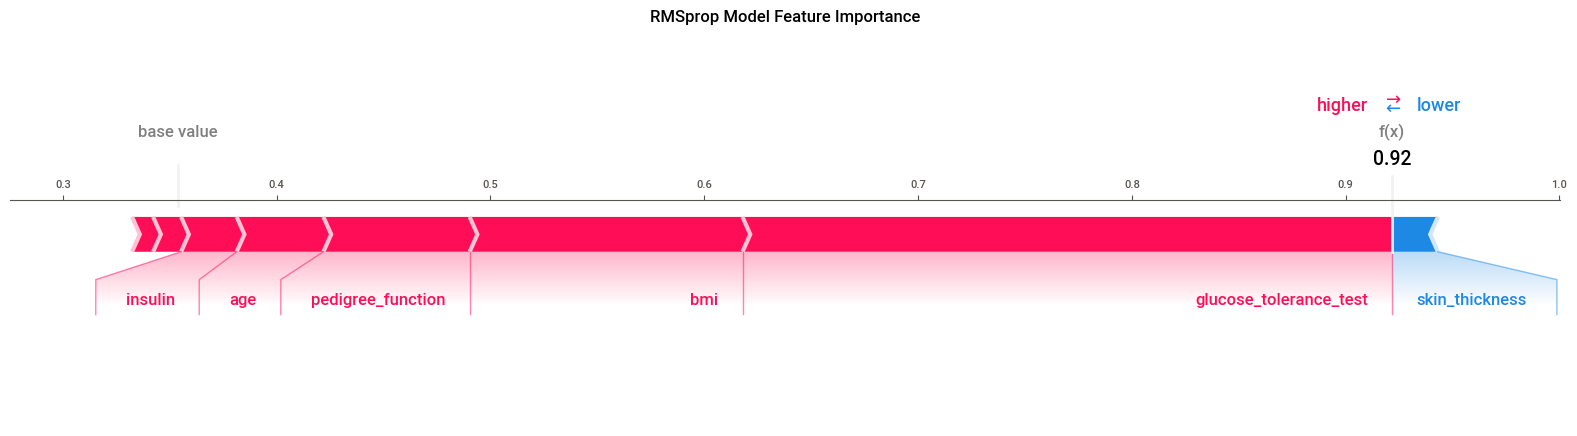


SGD Model with Batch Size: 20 and Epochs: 800
Creating Model
Fitting Model


Using 576 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Making Model Predictions
Calculating AUC Score
SGD Model auc_score :0.8511044776119403
SGD: Computing Model validation loss performance
         loss  accuracy  val_loss  val_accuracy
393  0.432101  0.814236   0.46756      0.765625
  Optimizer  Input Val Loss  Output Val Loss  Input Val Accuracy  \
0         0        0.000000         0.000000            0.000000   
1   RMSprop        0.664082         0.519842            0.697917   
2       SGD        0.732052         0.467560            0.572917   

   Output Val Accuracy  AUC Score  Epochs  Actual Epochs  
0             0.000000        NaN     NaN            NaN  
1             0.744792   0.810866   900.0          265.0  
2             0.765625   0.851104   800.0          394.0  



SGD: List Feature Importance
                 Features  Importance Model
1  glucose_tolerance_test    0.175242   SGD
7                     age    0.050878   SGD
5                     bmi    0.045077   SGD
0          times_pregnant    0.034531   SGD
4                 insulin    0.023013   SGD
6       pedigree_function    0.021368   SGD
3          skin_thickness    0.020594   SGD
2          blood_pressure    0.016589   SGD

SGD: ROC Curve:


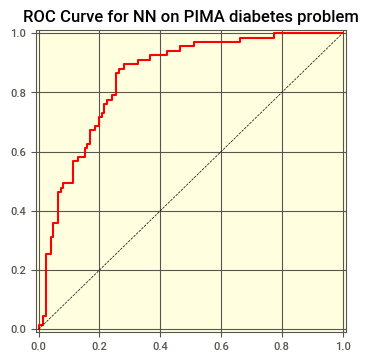

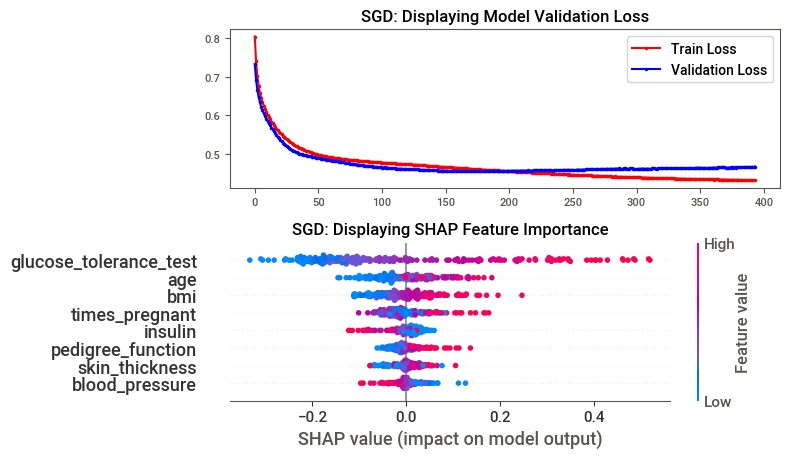

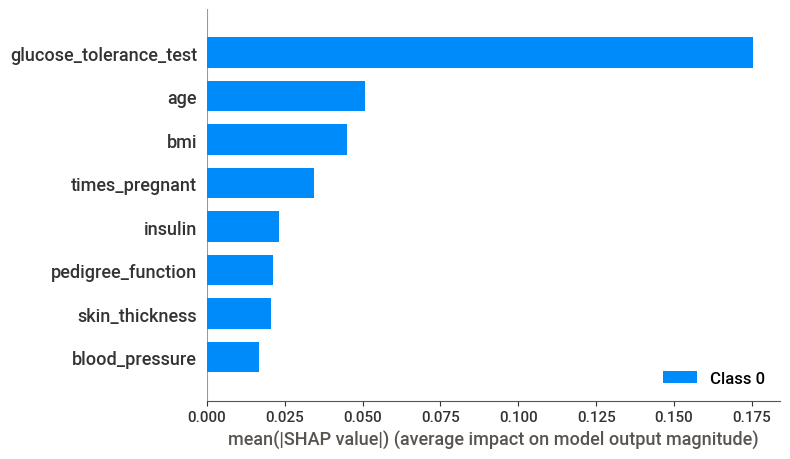

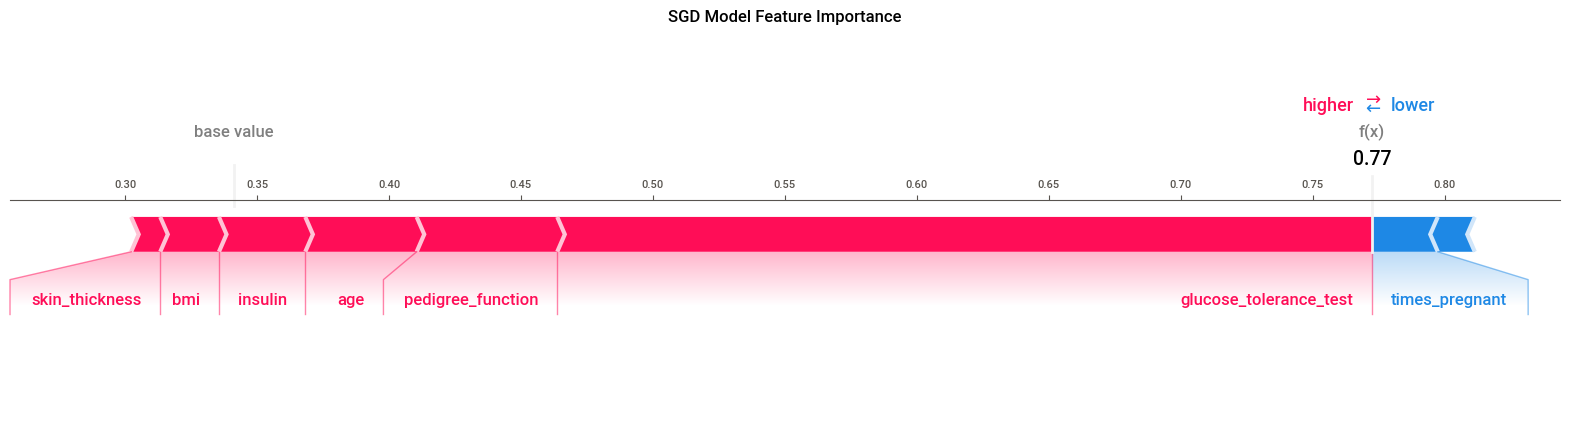


Nadam Model with Batch Size: 10 and Epochs: 800
Creating Model
Fitting Model


Using 576 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Making Model Predictions
Calculating AUC Score
Nadam Model auc_score :0.8262686567164179
Nadam: Computing Model validation loss performance
         loss  accuracy  val_loss  val_accuracy
240  0.402151  0.810764  0.486368      0.776042
  Optimizer  Input Val Loss  Output Val Loss  Input Val Accuracy  \
0         0        0.000000         0.000000            0.000000   
1   RMSprop        0.664082         0.519842            0.697917   
2       SGD        0.732052         0.467560            0.572917   
3     Nadam        0.704898         0.486368            0.651042   

   Output Val Accuracy  AUC Score  Epochs  Actual Epochs  
0             0.000000        NaN     NaN            NaN  
1             0.744792   0.810866   900.0          265.0  
2             0.765625   0.851104   800.0          394.0  
3             0.776042   0.826269   800.0          241.0  



Nadam: List Feature Importance
                 Features  Importance  Model
1  glucose_tolerance_test    0.179169  Nadam
5                     bmi    0.079997  Nadam
7                     age    0.071661  Nadam
0          times_pregnant    0.030211  Nadam
6       pedigree_function    0.022472  Nadam
4                 insulin    0.017829  Nadam
3          skin_thickness    0.013714  Nadam
2          blood_pressure    0.011544  Nadam

Nadam: ROC Curve:


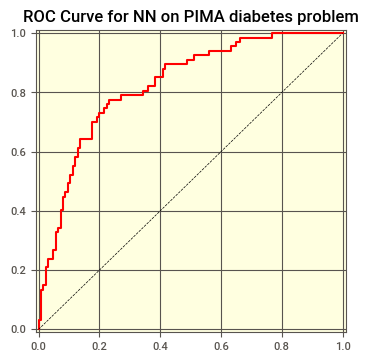

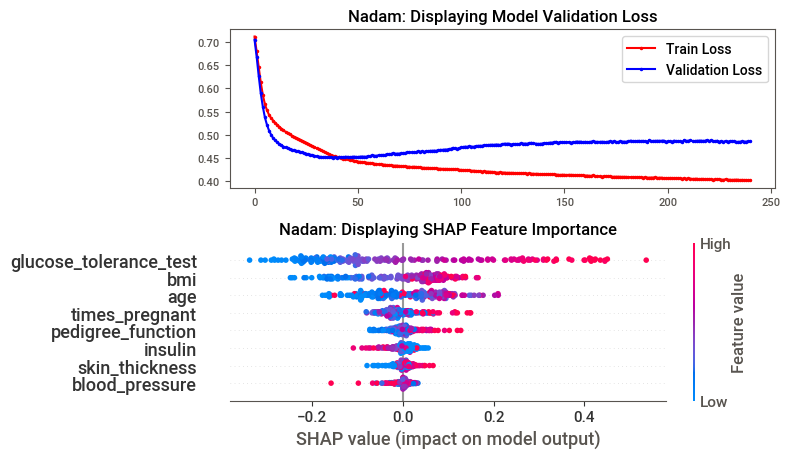

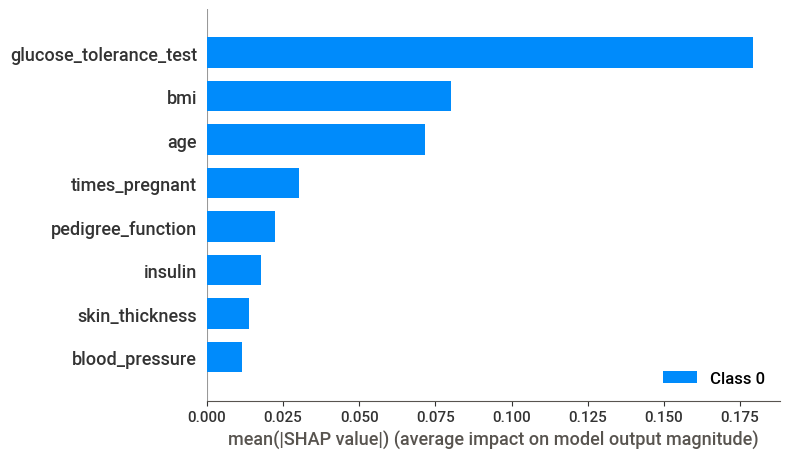

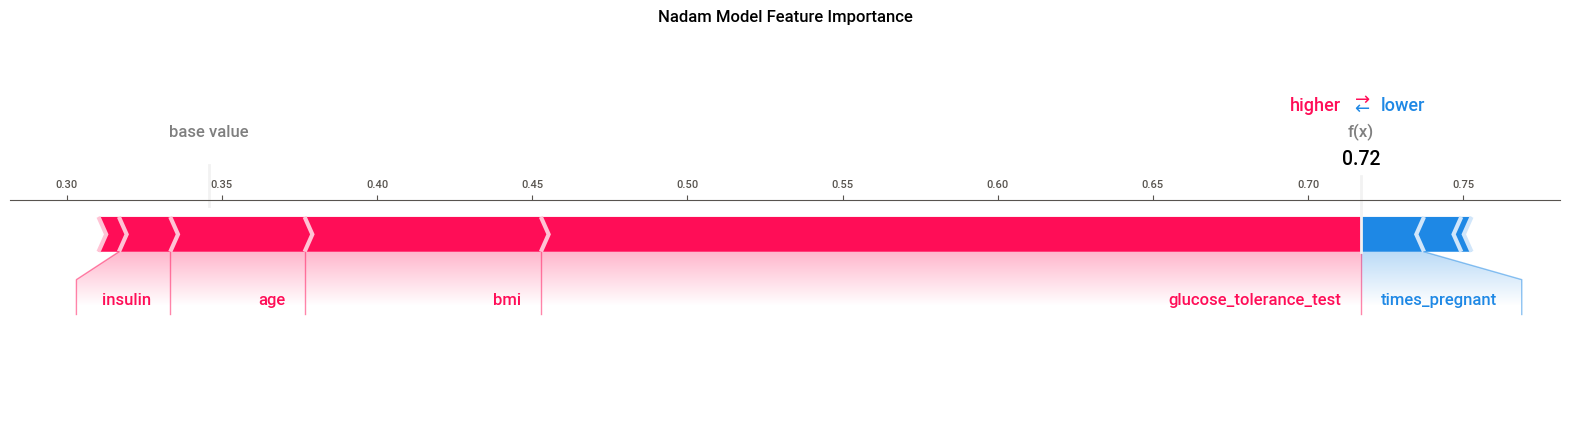


Adamax Model with Batch Size: 10 and Epochs: 900
Creating Model
Fitting Model


Using 576 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Making Model Predictions
Calculating AUC Score
Adamax Model auc_score :0.8411940298507463
Adamax: Computing Model validation loss performance
         loss  accuracy  val_loss  val_accuracy
545  0.438843  0.788194   0.46459      0.776042
  Optimizer  Input Val Loss  Output Val Loss  Input Val Accuracy  \
0         0        0.000000         0.000000            0.000000   
1   RMSprop        0.664082         0.519842            0.697917   
2       SGD        0.732052         0.467560            0.572917   
3     Nadam        0.704898         0.486368            0.651042   
4    Adamax        0.736525         0.464590            0.432292   

   Output Val Accuracy  AUC Score  Epochs  Actual Epochs  
0             0.000000        NaN     NaN            NaN  
1             0.744792   0.810866   900.0          265.0  
2             0.765625   0.851104   800.0          394.0  
3             0.776042   0.826269   800.0          241.0  
4             0.776042   0.841194   900.0          546.0  


Adamax: List Feature Importance
                 Features  Importance   Model
1  glucose_tolerance_test    0.158482  Adamax
5                     bmi    0.069657  Adamax
7                     age    0.061823  Adamax
0          times_pregnant    0.032609  Adamax
6       pedigree_function    0.023062  Adamax
3          skin_thickness    0.015775  Adamax
2          blood_pressure    0.013057  Adamax
4                 insulin    0.012496  Adamax

Adamax: ROC Curve:


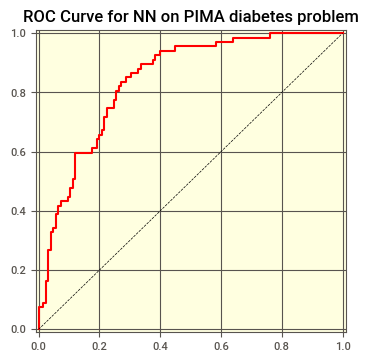

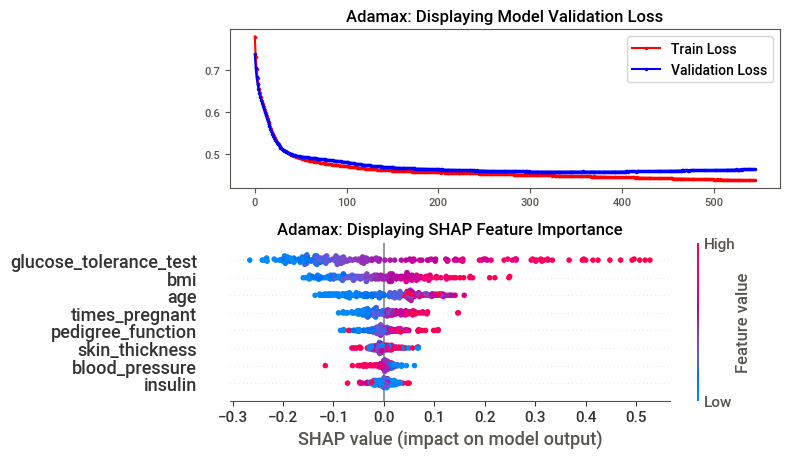

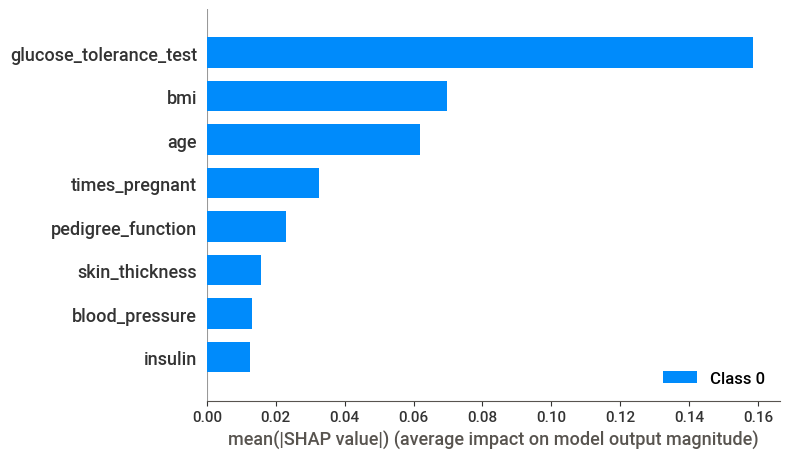

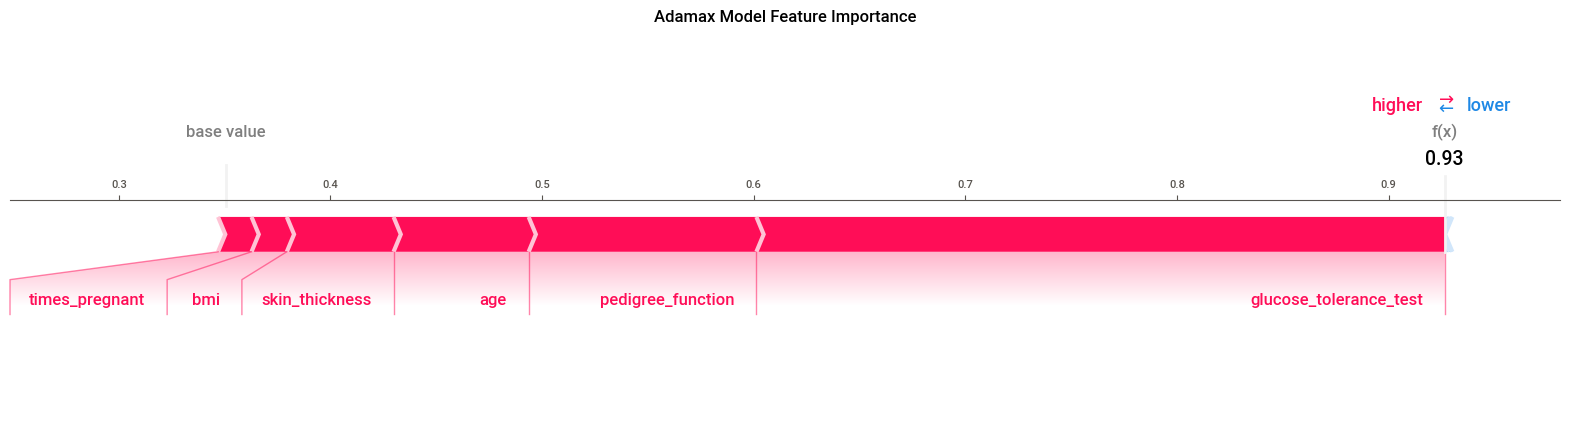


Adadelta Model with Batch Size: 20 and Epochs: 800
Creating Model
Fitting Model


Using 576 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Making Model Predictions
Calculating AUC Score
Adadelta Model auc_score :0.7383880597014926
Adadelta: Computing Model validation loss performance
         loss  accuracy  val_loss  val_accuracy
799  0.616719  0.651042  0.587543      0.651042
  Optimizer  Input Val Loss  Output Val Loss  Input Val Accuracy  \
0         0        0.000000         0.000000            0.000000   
1   RMSprop        0.664082         0.519842            0.697917   
2       SGD        0.732052         0.467560            0.572917   
3     Nadam        0.704898         0.486368            0.651042   
4    Adamax        0.736525         0.464590            0.432292   
5  Adadelta        0.612426         0.587543            0.651042   

   Output Val Accuracy  AUC Score  Epochs  Actual Epochs  
0             0.000000        NaN     NaN            NaN  
1             0.744792   0.810866   900.0          265.0  
2             0.765625   0.851104   800.0          394.0  
3             0.776042   0.826269   800.0    


Adadelta: List Feature Importance
                 Features  Importance     Model
7                     age    0.060745  Adadelta
1  glucose_tolerance_test    0.025040  Adadelta
5                     bmi    0.018069  Adadelta
2          blood_pressure    0.016655  Adadelta
4                 insulin    0.016061  Adadelta
3          skin_thickness    0.012444  Adadelta
6       pedigree_function    0.011359  Adadelta
0          times_pregnant    0.006161  Adadelta

Adadelta: ROC Curve:


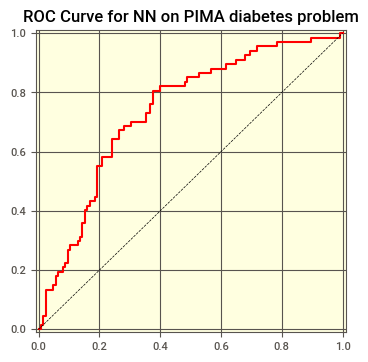

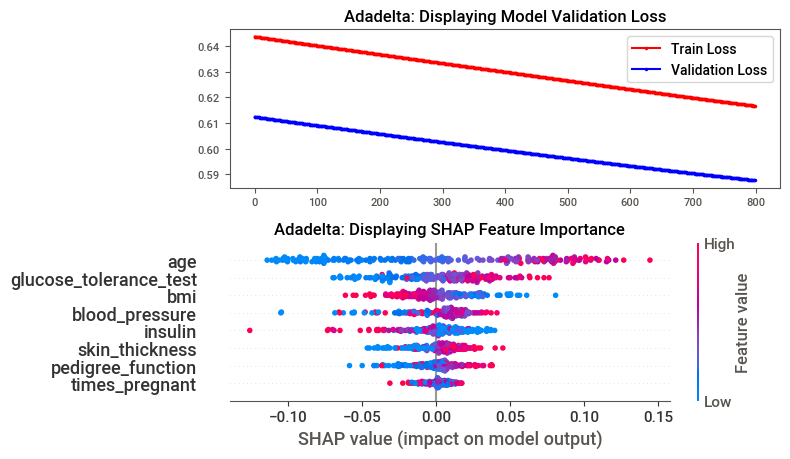

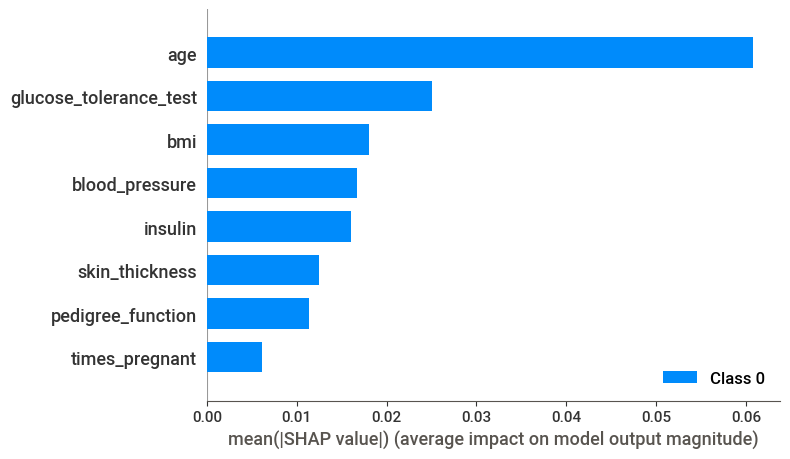

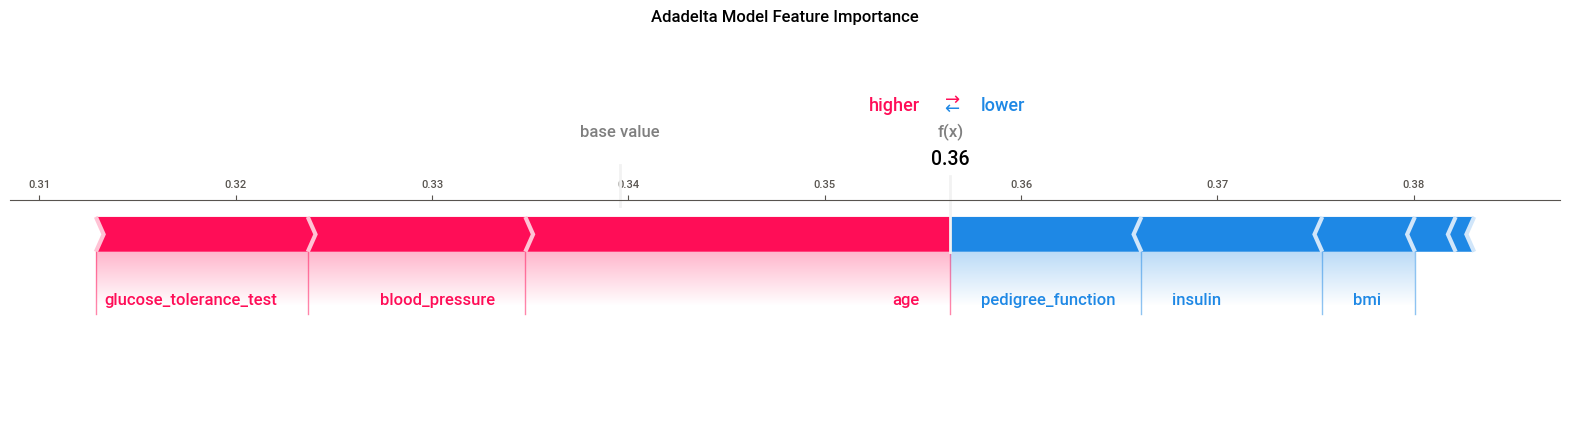


Adam Model with Batch Size: 10 and Epochs: 900
Creating Model
Fitting Model


Using 576 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Making Model Predictions
Calculating AUC Score
Adam Model auc_score :0.8208955223880596
Adam: Computing Model validation loss performance
         loss  accuracy  val_loss  val_accuracy
264  0.401989  0.815972  0.498047      0.744792
  Optimizer  Input Val Loss  Output Val Loss  Input Val Accuracy  \
0         0        0.000000         0.000000            0.000000   
1   RMSprop        0.664082         0.519842            0.697917   
2       SGD        0.732052         0.467560            0.572917   
3     Nadam        0.704898         0.486368            0.651042   
4    Adamax        0.736525         0.464590            0.432292   
5  Adadelta        0.612426         0.587543            0.651042   
6      Adam        0.655232         0.498047            0.671875   

   Output Val Accuracy  AUC Score  Epochs  Actual Epochs  
0             0.000000        NaN     NaN            NaN  
1             0.744792   0.810866   900.0          265.0  
2             0.765625   0.851104   800.0   


Adam: List Feature Importance
                 Features  Importance Model
1  glucose_tolerance_test    0.170184  Adam
5                     bmi    0.072324  Adam
0          times_pregnant    0.040196  Adam
7                     age    0.035781  Adam
3          skin_thickness    0.020557  Adam
4                 insulin    0.019800  Adam
6       pedigree_function    0.019177  Adam
2          blood_pressure    0.018084  Adam

Adam: ROC Curve:


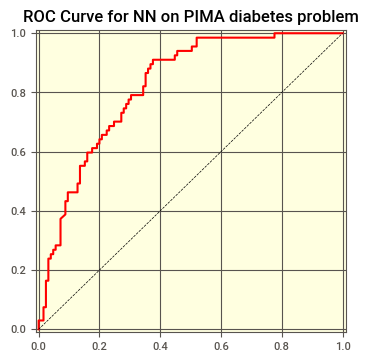

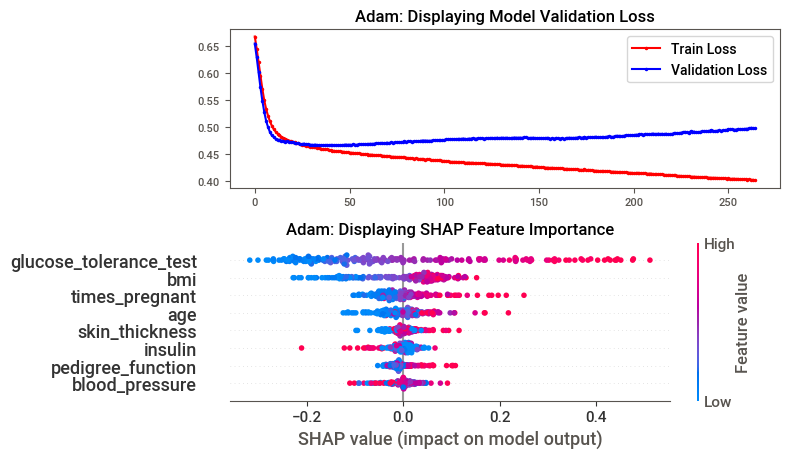

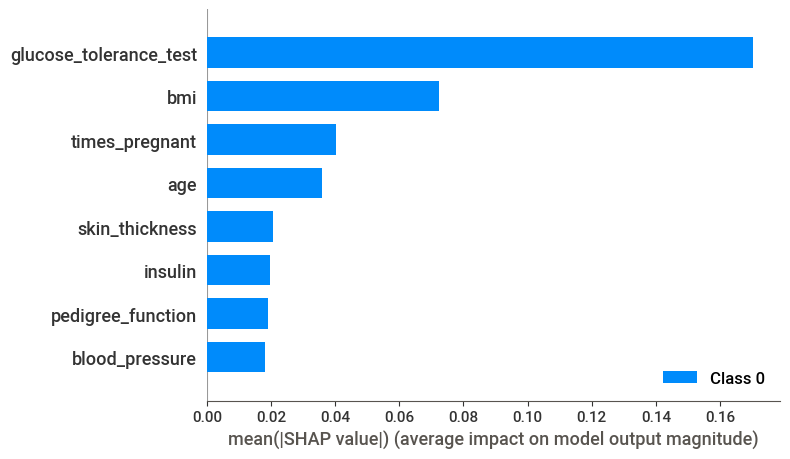

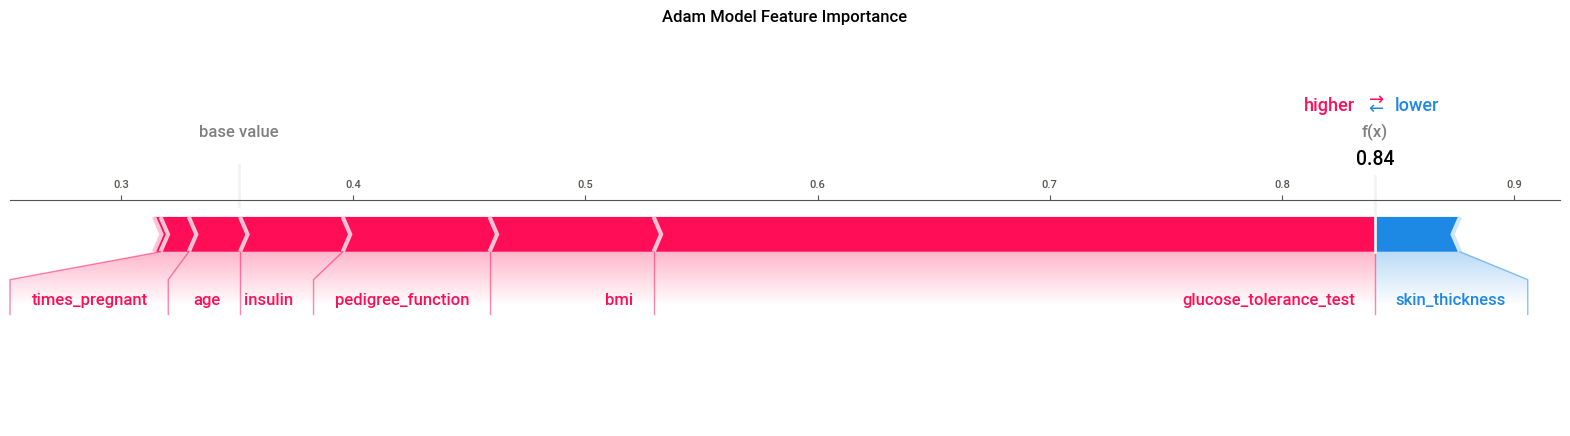


Adagrad Model with Batch Size: 10 and Epochs: 900
Creating Model
Fitting Model


Using 576 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Making Model Predictions
Calculating AUC Score
Adagrad Model auc_score :0.8320000000000001
Adagrad: Computing Model validation loss performance
         loss  accuracy  val_loss  val_accuracy
899  0.534858  0.682292  0.514088       0.71875
  Optimizer  Input Val Loss  Output Val Loss  Input Val Accuracy  \
0         0        0.000000         0.000000            0.000000   
1   RMSprop        0.664082         0.519842            0.697917   
2       SGD        0.732052         0.467560            0.572917   
3     Nadam        0.704898         0.486368            0.651042   
4    Adamax        0.736525         0.464590            0.432292   
5  Adadelta        0.612426         0.587543            0.651042   
6      Adam        0.655232         0.498047            0.671875   
7   Adagrad        0.635958         0.514088            0.645833   

   Output Val Accuracy  AUC Score  Epochs  Actual Epochs  
0             0.000000        NaN     NaN            NaN  
1             0.744792   0.81


Adagrad: List Feature Importance
                 Features  Importance    Model
5                     bmi    0.064633  Adagrad
1  glucose_tolerance_test    0.059301  Adagrad
7                     age    0.036672  Adagrad
2          blood_pressure    0.023516  Adagrad
6       pedigree_function    0.022678  Adagrad
0          times_pregnant    0.021181  Adagrad
4                 insulin    0.013991  Adagrad
3          skin_thickness    0.013115  Adagrad

Adagrad: ROC Curve:


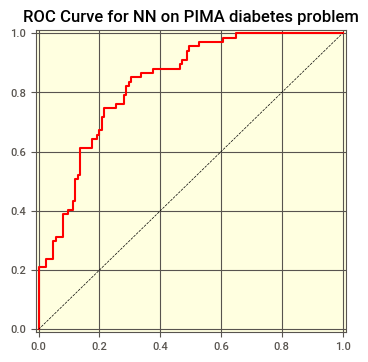

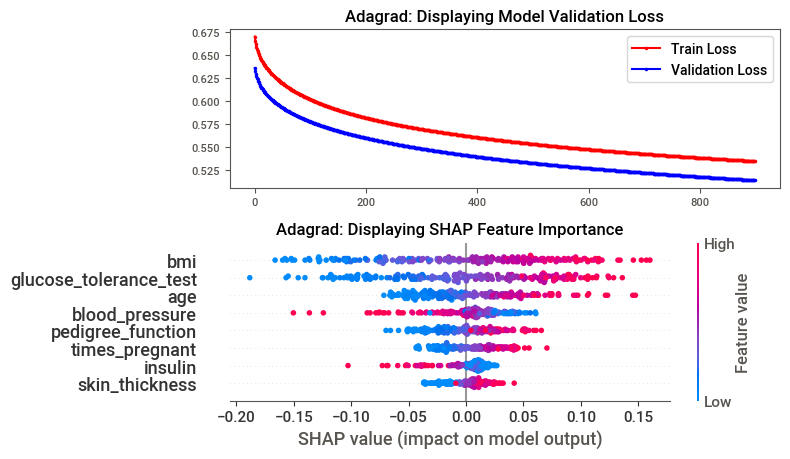

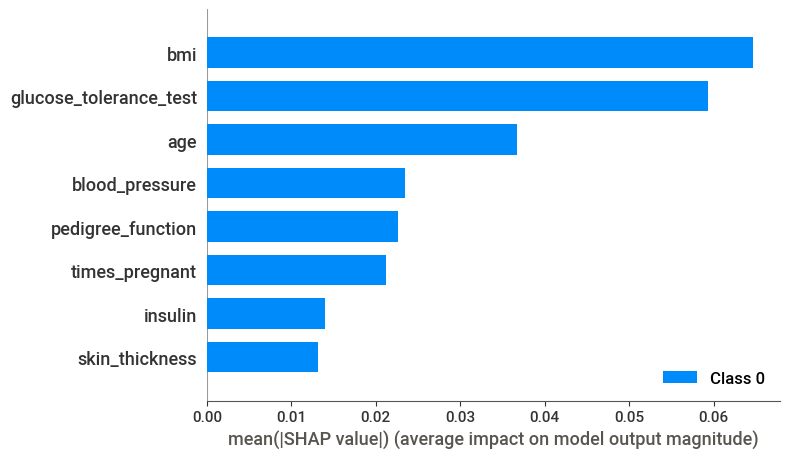

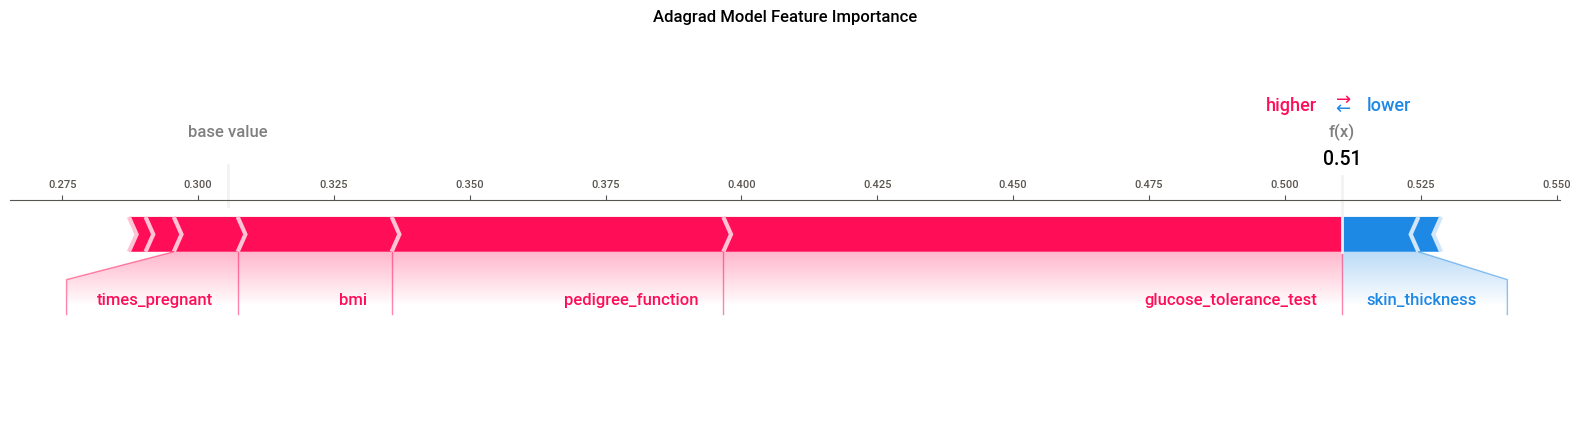

In [52]:
optimizer_list = result_df['optimizer'].unique()
#optimizer_list = optimizer_list[:1] # Get the number of models from list...use 1 if only the top performing model is required, however, it may not always give best results
print(colored((" Building Keras for Optimizers: " + optimizer_list), 'blue', attrs=['bold']))
        
for i in optimizer_list:
    opt = result_df.loc[result_df['optimizer'] == i]
    b_opt = int(opt['batch_size'].iloc[0])
    e_opt = int(opt['epochs'].iloc[0])

    # Create model
    print(colored(("\n" + str(i) + " Model with Batch Size: " + str(b_opt) + " and Epochs: " + str(e_opt)), 'magenta', attrs=['bold'])
         +colored('\nCreating Model', 'green', attrs=['bold']))
    model = Sequential()
    model.add(Dense(6, input_shape=(c,), activation="relu"))
    model.add(Dense(6,  activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    # Compile model
    model.compile(optimizer=i, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Set Callbacks
    #   Simple Early Stopping to stop training As soon as the loss of the model begins to increase on the test dataset
    es = EarlyStopping(monitor='val_loss', mode='min', patience=(e_opt/4), verbose=0)# Add patience=(e_opt/4) to set stop
    # Model Checkpoint: The mode parameter controls whether the ModelCheckpoint should be looking for values that minimize our metric or maximize it. 
    #   Since we are working with loss, lower is better, so we set mode="min". If we were instead working with val_acc, we would set mode="max" (since higher accuracy is better).
    mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=0, save_best_only=True)
    
    print(colored('Fitting Model', 'blue', attrs=['bold']))
    # the fit function returns the run history and is very convenient, as it contains information about the model fit, iterations etc.
    #By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
        #verbose=0 will show you nothing (silent)
        #verbose=1 will show you an animated progress bar =======
        #verbose=2 will just mention the number of epoch [Epoch 1/10]
    
    run_hist =  model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=e_opt, batch_size=b_opt, verbose=0, callbacks=[es, mc])

    # Let's look at the run_hist_1 object that was created, specifically its history attribute.
    ##run_hist.history.keys()
    
    print(colored('Making Model Predictions', 'magenta', attrs=['bold']))
    y_pred_prob_nn = model.predict(X_test_norm)#.ravel()
    y_pred_class_nn = np.argmax(y_pred_prob_nn,axis=0)
    
    
    print(colored('Calculating AUC Score', 'magenta', attrs=['bold']))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_nn)
    auc_score = auc(fpr, tpr)
    print(colored((str(i)+' Model auc_score :'+ str(auc_score)), 'magenta', attrs=['bold']))
    
    # Print model validation loss performance
    print(colored((i+': Computing Model validation loss performance'), 'magenta', attrs=['bold']))
    m = ((run_hist.history))
    m = pd.DataFrame.from_dict(m, orient='columns')
    print(colored(m.tail(1), 'magenta', attrs=['bold']))
    # Get val_loss value for head and tail
    vlh = ((m["val_loss"].head(1).iloc[0]))
    vlt = ((m["val_loss"].tail(1).iloc[0]))
    vah = ((m["val_accuracy"].head(1).iloc[0]))
    vat = ((m["val_accuracy"].tail(1).iloc[0]))
    e_act = (len(run_hist.history['loss']))
    
    # initialize data of lists.
    data = {'Optimizer': [i],
            'AUC Score': [auc_score],
            'Input Val Loss': [vlh],
            'Output Val Loss': [vlt],
            'Input Val Accuracy': [vah],
            'Output Val Accuracy': [vat],
            'Epochs': [e_opt],
            'Actual Epochs': [e_act]}
    # Create DataFrame
    m = pd.DataFrame(data)
    res = res.append(m, ignore_index=True)
    print(colored(res, 'blue', attrs=['bold']))

    # Get Feature Importance
    e = shap.KernelExplainer(model, X_train_norm)
    shap_values = e.shap_values(X_test_norm)
    
    # Get Feature Importance in Dataframe
    shap_mean = np.abs(shap_values).mean(axis=0)
    shap_mean = pd.DataFrame(shap_mean, columns = features)
    shap_mean = shap_mean.mean()
    shap_df = shap_mean.to_frame().reset_index()
    shap_df = shap_df.rename({'index':'Features', 0: 'Importance'}, axis=1)#.sort_values(by='Importance', ascending=True)
    shap_df['Importance'] = abs(shap_df['Importance'])
    shap_df['Model'] = (i)
    shap_df = shap_df.sort_values(by='Importance', ascending=False)
    model_features = model_features.append(shap_df, ignore_index=True)
    
    print(colored((i+': List Feature Importance\n'), 'magenta', attrs=['bold'])
         +colored(shap_df, 'blue', attrs=['bold']))   
    
    # Plot the roc curve
    print(colored(('\n'+i+': ROC Curve:'), 'magenta', attrs=['bold']))
    plot_roc(y_test, y_pred_prob_nn, 'NN')

    # Let's plot the training loss and the validation loss over the different epochs and see how it looks.
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(run_hist.history["loss"],'r', marker='.', label="Train Loss")
    ax1.plot(run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
    ax1.set(title= (i + ': Displaying Model Validation Loss').format(i))
    ax1.legend()
    ax2.set(title= (i + ': Displaying SHAP Feature Importance').format(i))

    #We can use the shapely values to interpret our model. ‘force_plot’ showing how each feature influences the output. 
    s3 = shap.summary_plot(shap_values[0], X_test, feature_names=features)
    s4 = shap.summary_plot(shap_values, X_test, feature_names=features, plot_type = 'bar', title=(i + ': Displaying SHAP Feature Importance with Bars'))
    
    # We can use the shapely values to interpret our model. 
    shap.initjs()
    # visualize the first prediction's explanation with a force plot
    #shap.force_plot(e.expected_value[0], shap_values[0][0], features = features)
    shap.plots.force(e.expected_value[0], shap_values[0][0],features = features, matplotlib=True, show=False)
    plt.title(i + " Model Feature Importance", y=1.75)
    plt.show()

In [53]:
display_alert_color_4("3c) Summarizing Employed Models", "darkblue","warning")

In [54]:
res2= res.copy()
#res = res.tail(-1) # will get rid of the first row
res2['val_loss_diff']= res2['Output Val Loss']-res2['Input Val Loss']
res2['val_acc_diff']= res2['Output Val Accuracy']-res2['Input Val Accuracy']
res2 = res2[~(res2['val_loss_diff'] > 0)] # Delete if output validation loss is greater than input validation loss

res2['per_epochs_diff']= (res2['Actual Epochs']/res2['Epochs'])*100
#res2 = res2.tail(-1)# Delets first line
##res2 = res2[~(res2['AUC Score'] <= 0.80)]
res2.Optimizer[res2.Optimizer=="0"] = "RF" # Add Random Forest
res2.loc[res2['AUC Score'].isnull(), 'AUC Score'] = (rf_acc) # Add Random Forest ROC_auc score
res2 = res2.replace(np.nan,0)
res2 = res2.astype({'Epochs':'int64', 'Actual Epochs':'int64', 'per_epochs_diff':'int64'})
res2['epochs_diff']= res2['Epochs']-res2['Actual Epochs']
res2 = res2.sort_values(['epochs_diff','AUC Score'], ascending = [True, False]).reset_index(drop=True)# (drop=True) does not add the current row index as a new column in DataFrame
res2 = res2.round(3)
display_alert_color_4("3d) Model Choice", "darkblue","danger")
display_alert_color_4("3d-i) Result Summary", "darkblue","warning")
print(colored('\nAlthough, the assignment required construction of Deep Learning Models (DLM), however, Random Forest was also included as a baseline\n\
measure to compare performance of DLM against other unsupervised classification algorithms. As evident from the Result Summary Table below, \n\
based on ROC AUC Score, all variations of DLM outperformed Random Forest Model, indicating it to be a better choice for diabetes prediction. ', 'green', attrs=['bold'])
      +colored('\n\nResult Summary Table: ', 'blue', attrs=['bold'])
             )
res2


Although, the assignment required construction of Deep Learning Models (DLM), however, Random Forest was also included as a baseline
measure to compare performance of DLM against other unsupervised classification algorithms. As evident from the Result Summary Table below, 
based on ROC AUC Score, all variations of DLM outperformed Random Forest Model, indicating it to be a better choice for diabetes prediction. 

Result Summary Table: 


Optimizer  Input Val Loss  Output Val Loss  Input Val Accuracy  \
0   Adagrad           0.636            0.514               0.646   
1        RF           0.000            0.000               0.000   
2  Adadelta           0.612            0.588               0.651   
3    Adamax           0.737            0.465               0.432   
4       SGD           0.732            0.468               0.573   
5     Nadam           0.705            0.486               0.651   
6      Adam           0.655            0.498               0.672   
7   RMSprop           0.664            0.520               0.698   

   Output Val Accuracy  AUC Score  Epochs  Actual Epochs  val_loss_diff  \
0                0.719      0.832     900            900         -0.122   
1                0.000      0.755       0              0          0.000   
2                0.651      0.738     800            800         -0.025   
3                0.776      0.841     900            546         -0.272   
4                0.766      0.851     800            394         -0.264   
5                0.776      0.826     800            241         -0.219   
6                0.745      0.821     900            265         -0.157   
7                0.745      0.811     900            265         -0.144   

   val_acc_diff  per_epochs_diff  epochs_diff  
0         0.073              100            0  
1         0.000                0            0  
2         0.000              100            0  
3         0.344               60          354  
4         0.193               49          406  
5         0.125               30          559  
6         0.073               29          635  
7         0.047               29          635

In [55]:
auc_thres = rf_acc # Since its baseline
conditions = [
    (res2['per_epochs_diff'] == 100) & (res2['AUC Score'] > float(auc_thres)), # least probability of overfitting and high roc auc acceptability
    (res2['per_epochs_diff'] > 0) & (res2['AUC Score'] > float(auc_thres)),    # slight probability of overfitting but high roc auc acceptability
    (res2['per_epochs_diff'] == 0) & (res2['AUC Score'] <= float(auc_thres)),  # least probability of overfitting in random forest due to hypertuned parameters
    (res2['per_epochs_diff'] == 100) & (res2['AUC Score'] < float(auc_thres))  # high probability of overfitting
    ]
values = [1, 2, 3,4]
res2['Rank'] = np.select(conditions, values)
res2 = res2.sort_values(['Rank','AUC Score'], ascending = [True, False]).reset_index(drop=True)# (drop=True) does not add the current row index as a new column in DataFrame
res2

Optimizer  Input Val Loss  Output Val Loss  Input Val Accuracy  \
0   Adagrad           0.636            0.514               0.646   
1       SGD           0.732            0.468               0.573   
2    Adamax           0.737            0.465               0.432   
3     Nadam           0.705            0.486               0.651   
4      Adam           0.655            0.498               0.672   
5   RMSprop           0.664            0.520               0.698   
6        RF           0.000            0.000               0.000   
7  Adadelta           0.612            0.588               0.651   

   Output Val Accuracy  AUC Score  Epochs  Actual Epochs  val_loss_diff  \
0                0.719      0.832     900            900         -0.122   
1                0.766      0.851     800            394         -0.264   
2                0.776      0.841     900            546         -0.272   
3                0.776      0.826     800            241         -0.219   
4                0.745      0.821     900            265         -0.157   
5                0.745      0.811     900            265         -0.144   
6                0.000      0.755       0              0          0.000   
7                0.651      0.738     800            800         -0.025   

   val_acc_diff  per_epochs_diff  epochs_diff  Rank  
0         0.073              100            0     1  
1         0.193               49          406     2  
2         0.344               60          354     2  
3         0.125               30          559     2  
4         0.073               29          635     2  
5         0.047               29          635     2  
6         0.000                0            0     3  
7         0.000              100            0     4

In [56]:
display_alert_color_4("3d-ii) Model Choice and Justification", "darkblue","warning")
best_model_features = model_features.copy()

# Choose best Model
best_model = ((res2["Optimizer"].iloc[0]))
best_model_features = best_model_features.tail(-1)# Delets first line
best_model_features = best_model_features.loc[best_model_features['Model'] == best_model].reset_index(drop=True) # Keep features for final model only
best_model_features = best_model_features.drop(['Model'], axis=1)
print(colored("\n\nRecommended Model and Justification:", 'blue', attrs=['bold'])
      + colored("\n\nSince performance measurement is an essential task in machine learning,\n\
hence, for classification problems, AUC-ROC Curve is a reliable measure.\n\
As such, for visualizing performance of a multi-class diabetes prediction problem,\n\
the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve has been utilized since\n\
it is one of the most important evaluation metrics for checking any classification model’s performance.\n\n\
\
Apart from AUC Score, validation loss was also taken into account which allowed final model selection on \n\
the premise that validation loss continuously decined to ensure no overfitting has occured.\n\n" , 'green', attrs=['bold'])
     +colored('\nBased on the above criterion, Best Model was found to be ', 'blue', attrs=['bold'])
     +colored(best_model, 'magenta', attrs=['bold'])
     +colored(' with an roc_auc of ', 'blue', attrs=['bold'])
     +colored(str(res2["AUC Score"].iloc[0]), 'magenta', attrs=['bold'])
     +colored('.\nwhich successfully satisfied both primary and secondary objectives.', 'blue', attrs=['bold'])
     +colored("\n\nHence, we recommend this model for Diabetes Prediction.\n\n", 'magenta', attrs=['bold'])
     +colored((best_model), 'magenta', attrs=['bold'])
     +colored((' Model Features in terms of importance are given below:\n\n '), 'green', attrs=['bold'])
     +colored(best_model_features, 'red', attrs=['bold'])
             )



Recommended Model and Justification:

Since performance measurement is an essential task in machine learning,
hence, for classification problems, AUC-ROC Curve is a reliable measure.
As such, for visualizing performance of a multi-class diabetes prediction problem,
the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve has been utilized since
it is one of the most important evaluation metrics for checking any classification model’s performance.

Apart from AUC Score, validation loss was also taken into account which allowed final model selection on 
the premise that validation loss continuously decined to ensure no overfitting has occured.


Based on the above criterion, Best Model was found to be Adagrad with an roc_auc of 0.832.
which successfully satisfied both primary and secondary objectives.

Hence, we recommend this model for Diabetes Prediction.

Adagrad Model Features in terms of importance are given below:

                  Features  Importance
0    

In [57]:
display_alert_color_3("4) Summary Key Findings and Insights", "darkblue","danger")

In [68]:
key_findings = model_features.sort_values(['Importance','Features'], ascending = [False, False]).reset_index(drop=True)# (drop=True) does not add the current row index as a new column in DataFrame
key_findings = key_findings[key_findings.Model != 'X']
key_findings_feature = key_findings.groupby(['Features', 'Model']).sum().unstack('Features')#, 'Model')
display_alert_color_4("4a) Key Findings: Feature Weights within Models", "darkblue","warning")
key_findings_feature

Importance                                                            \
Features        age blood_pressure       bmi glucose_tolerance_test   insulin   
Model                                                                           
Adadelta   0.060745       0.016655  0.018069               0.025040  0.016061   
Adagrad    0.036672       0.023516  0.064633               0.059301  0.013991   
Adam       0.035781       0.018084  0.072324               0.170184  0.019800   
Adamax     0.061823       0.013057  0.069657               0.158482  0.012496   
Nadam      0.071661       0.011544  0.079997               0.179169  0.017829   
RMSprop    0.075343       0.017175  0.098901               0.168594  0.035594   
SGD        0.050878       0.016589  0.045077               0.175242  0.023013   

                                                          
Features pedigree_function skin_thickness times_pregnant  
Model                                                     
Adadelta          0.011359       0.012444       0.006161  
Adagrad           0.022678       0.013115       0.021181  
Adam              0.019177       0.020557       0.040196  
Adamax            0.023062       0.015775       0.032609  
Nadam             0.022472       0.013714       0.030211  
RMSprop           0.024697       0.022470       0.021662  
SGD               0.021368       0.020594       0.034531

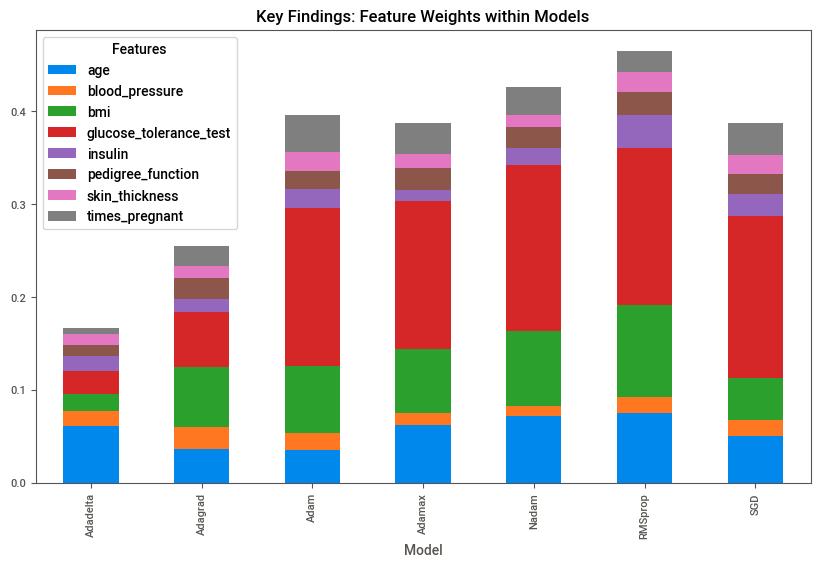

In [69]:
key_findings_feature.columns = key_findings_feature.columns.droplevel()
ax2=key_findings_feature.plot(kind='bar', stacked=True)
plt.title('Key Findings: Feature Weights within Models')
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

In [60]:
key_findings_model = key_findings.groupby(['Model', 'Features']).sum().unstack('Model')
display_alert_color_4("4b) Key Findings: Overall Feature Prominence", "darkblue","warning")
key_findings_model

Importance                                          \
Model                    Adadelta   Adagrad      Adam    Adamax     Nadam   
Features                                                                    
age                      0.060745  0.036672  0.035781  0.061823  0.071661   
blood_pressure           0.016655  0.023516  0.018084  0.013057  0.011544   
bmi                      0.018069  0.064633  0.072324  0.069657  0.079997   
glucose_tolerance_test   0.025040  0.059301  0.170184  0.158482  0.179169   
insulin                  0.016061  0.013991  0.019800  0.012496  0.017829   
pedigree_function        0.011359  0.022678  0.019177  0.023062  0.022472   
skin_thickness           0.012444  0.013115  0.020557  0.015775  0.013714   
times_pregnant           0.006161  0.021181  0.040196  0.032609  0.030211   

                                            
Model                    RMSprop       SGD  
Features                                    
age                     0.075343  0.050878  
blood_pressure          0.017175  0.016589  
bmi                     0.098901  0.045077  
glucose_tolerance_test  0.168594  0.175242  
insulin                 0.035594  0.023013  
pedigree_function       0.024697  0.021368  
skin_thickness          0.022470  0.020594  
times_pregnant          0.021662  0.034531

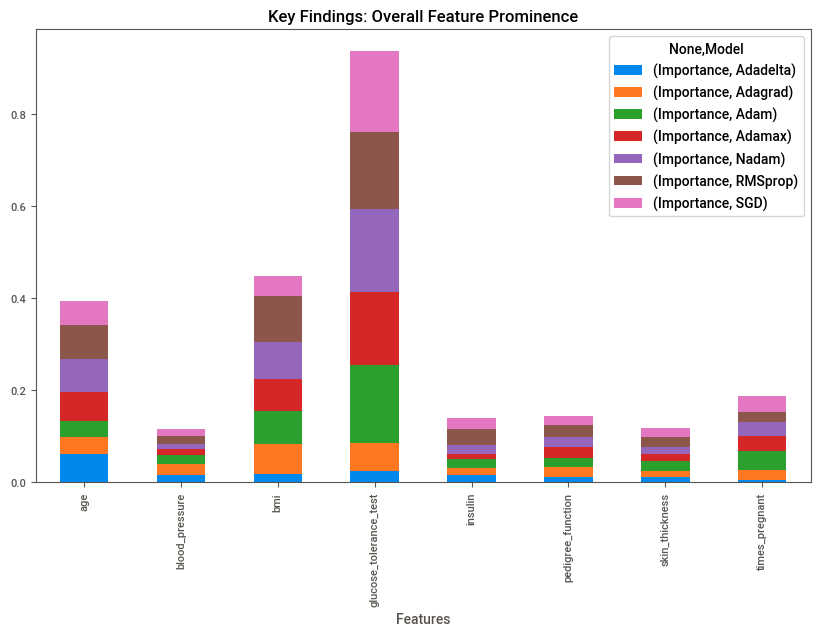

In [61]:
import matplotlib.pyplot as plt
from pylab import rcParams
#key_findings_model.columns = key_findings_model.columns.droplevel()
ax1=key_findings_model.plot(kind='bar', stacked=True)
plt.title('Key Findings: Overall Feature Prominence')
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

In [62]:
display_alert_color_3("5) Model Flaws and Future Directions", "darkblue","danger")
display_alert_color_4("5a) Model Shortcomings<br><br>\
Despite its novel approach to automatically pick best model with best parameters, the project is not without its shortcomings.<br><br>\
To begin with, it only utilized a very small dataset with merely nine features.<br><br>\
Hence, it may have discounted other important factors that may impact on set of diabetes.<br><br>\
Furthermore, the project could have employed other deep learning models to ensure even more improved results.<br><br>\
Then, employed Grid Search Hyperparameter Tuning proved to be computationally intensive and could have been replaced by more efficient methods.<br><br>\
This also led to a basic model architecture which discounted incorporating other parameters like different learning rates, momentum, etc.", "darkblue","warning")
display_alert_color_4("5b) Plan of action to revisit analysis<br><br>\
Future recommendations are, hence, as follows:<br><br>\
1) Use a larger dataset with more features.<br><br>\
2) Employ more unsupervised models like LSTM etc.<br><br>\
3) Try other Hyperparameter Tuning methods like Keras Tuner or Bayesian optimization (See, Section 5).<br><br>\
4) Include additional parameter search like learning rate, momentum, neuron activation function, etc. to make a more robust model.", "darkgreen","warning")

In [63]:
et = time.time()
t = et - st
t = '%.2f' %(float(t/60))

display_alert_color_3("Get Script End Time", "darkblue","info")
print(colored("Script End Time: ", 'blue', attrs=['bold']) + colored((t+' Minutes'), 'magenta', attrs=['bold']))

Script End Time: 33.37 Minutes


In [64]:
display_alert_color_3("6) Useful Links", "darkblue","danger")

In [65]:
display_alert_color_3("7) Github Links", "darkblue","danger")
display_alert_color_4("7a) Link to Main Folder", "darkblue","warning")

In [66]:
display_alert_color_3("8) References", "darkblue","danger")